# **CS5489 Course Project: BirdCLEF 2023** ([Kaggle](https://www.kaggle.com/competitions/birdclef-2023))

Team member:
* LIU Yuhao, 57164681, 50% contribution.
* YANG Shiyuan, 57580180, 50% contribution.

# 1 **Quick Overview**

### 1.1. **Deep Learning Methods**

#### 1.1.1. Feature Representations Used:
We tried different feature representations, including:

* Mel-spectrum with 128 bins.
* MFCC with 20 coefficients.
* Chroma feature with 12 keys.

Our cross-validation showed that **Mel-spectrum** was the best feature in the bird audio classification task, and we used it in our final submission.
<!-- We conduct cross validation to proved that **Mel-spectrum** is the best feature, which is used in final submission. -->

#### 1.1.2. Models used:
We also attempted various deep learning models, including:

* CNN Models:
    * EfficientNet-b2
    * MobileNetv3-small
    * ConvNext-tiny
* Transformer Model: Swin transformer tiny

After cross-validation, we found that EfficientNet-b2 achieved the best performance, we then again conduct cross-validation to choose its best learning rate (5e-4). These settings were adopted in our final submission.


### 1.2. **Machine Learning Methods**
#### 1.2.1. Various models used:
* Logistic regression
* Linear SVM
* RBF SVM
* AdaBoost
* XGBoost

Our cross validation shows that XGBoost achieves the best performance in machine learning methods.

#### 1.2.2. Feature dimension reduction used:
* K-means + TF-IDF
* PCA
* KPCA
* NMF

Our cross validation shows that NMF is the best feature in machine learning methods.

    
### 1.3. **Results**
Our final solution uses EfficientNet b2 model and Mel feature, ranking #351 on Kaggle leaderboard with a score of 0.78.


# 2 **Data Feature Representations**
We tried 3 different types of feature representations, all of them can be regarded as dimension-reduced representations compared with original audio, they are listed as follows by descending order of complexity. 


#### 2.1. **Mel-spectrum**
The Mel spectrogram is derived from the Short-Time Fourier Transform (STFT). In the Mel spectrogram, the frequency axis is logarithmically converted to the Mel scale, which more closely reflects how humans perceive pitch differences. The Mel scale places more emphasis on lower frequencies while compressing higher frequencies. To compute the Mel spectrogram:
* Audio signal is loaded with the sampling rate of 32kHz, which is required by kaggle official.
* The audio signal is divided into short, overlapping frames. Each frame is windowed with the size of 2048 and transformed using the Fourier Transform to obtain its frequency content. The stride between each window is 512 (aka, hop_length).
* These frequency components are then logarithmically mapped onto the Mel scale with 128 bins and converted into a log power spectrum (dB format).
* Therefore, the temporal length of a mel spectrum is sampling_rate(Hz) * audio_time (s) / hop_length.


#### 2.2. **MFCC**
MFCCs are a dimensionality-reduced version of the Mel-spectrogram.  To get the MFCC:
*  the Discrete Cosine Transform (DCT) is applied to each 128-dim log-Mel bin vector.  We use 20-dimension DCT as done in assignment 2, so the 128-dim vector is convereted to 20-dim in each time step. 

The resulting MFCCs are a compact representation of the spectral envelope, capturing timbral and phonetic characteristics of audio signals. Typically, only the first few coefficients (e.g., 20 in our case) are retained, as they contain the most relevant information.


#### 2.3. **Chroma**
Chroma features are a representation of audio that captures the tonal content of a music signal. Chroma features provide a compact representation of the energy distribution across 12 pitch classes (C, C#, D, D#, E, F, F#, G, G#, A, A#, and B) in a given audio signal. As can be seen, it's frequency is further reduced to 12 dim, so chroma map is a 12*T matrix, where T is the temporal length. Chroma features are derived from the underlying harmonic content of a piece of sound, and they are often used in music-related tasks such as: music genre classification, chord recognition, music similarity and recommendation, etc.


#### 2.4. **Visualization**
Here is the feature visualization, figures from left from right show the audio wave, Mel-spectrum, MFCC, and Chroma features of some sample audios:

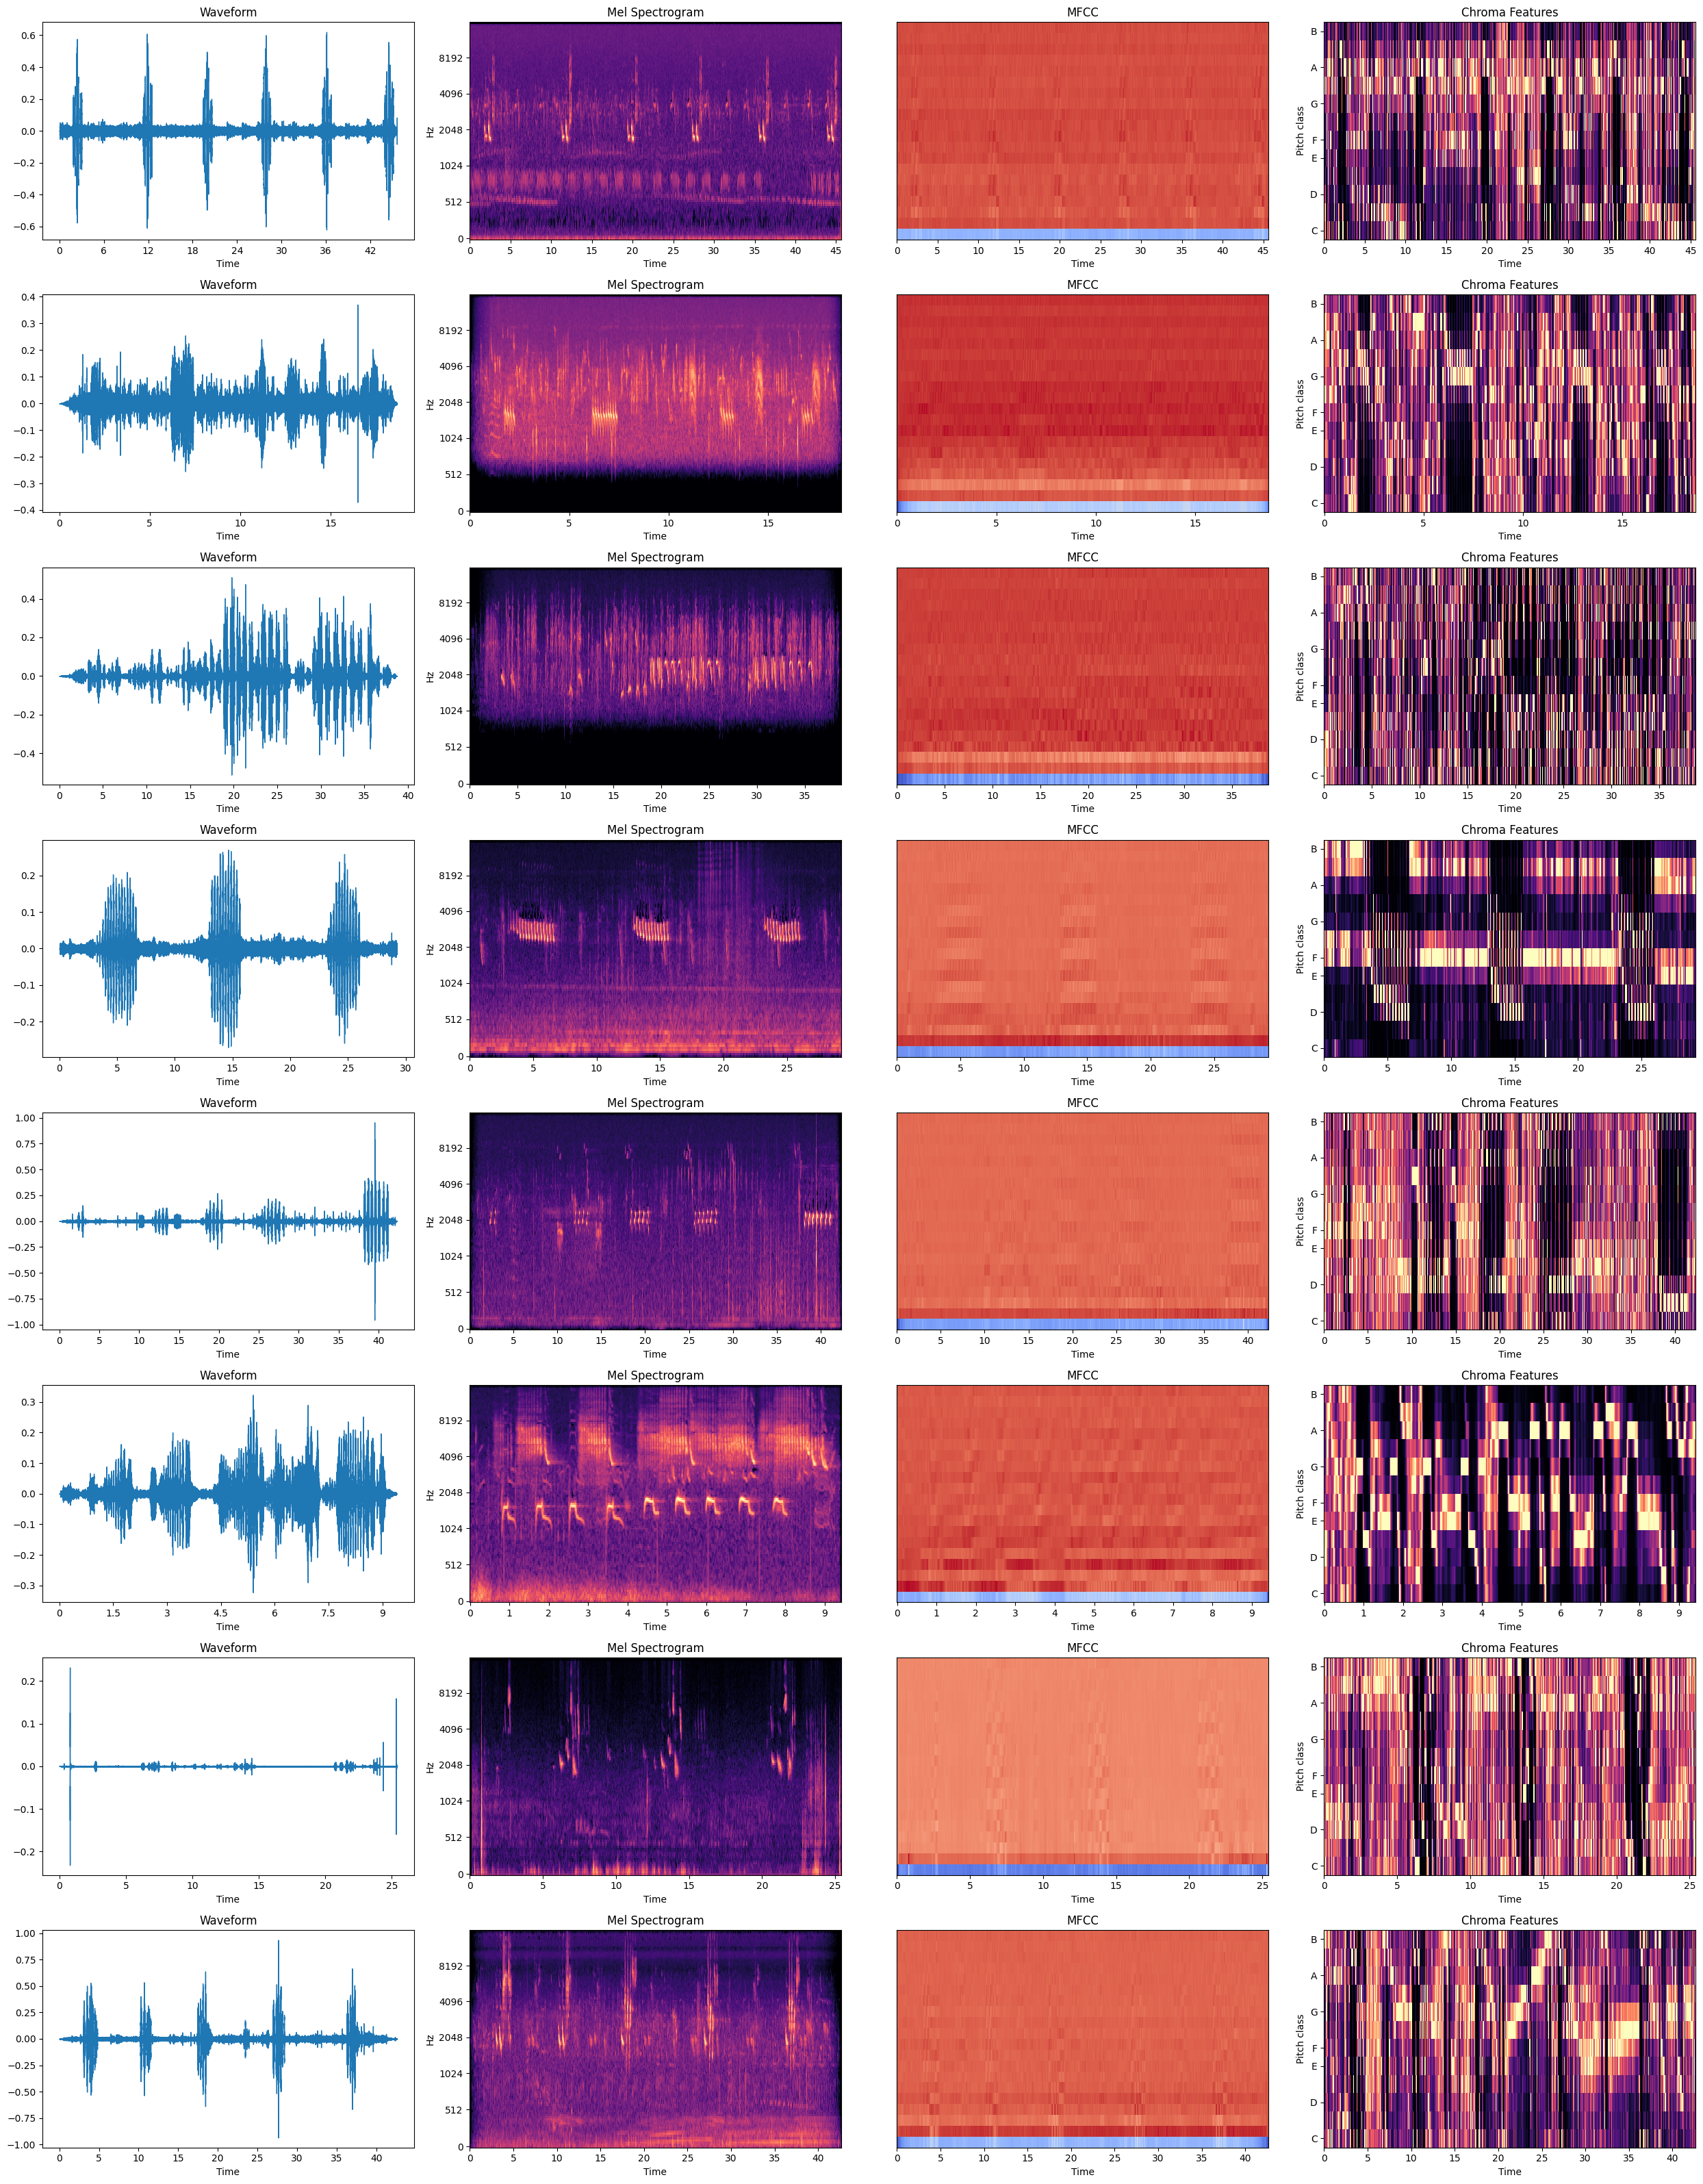

In [16]:
import librosa
import pandas as pd
import os

csv_data = pd.read_csv('train_metadata.csv')
######################### Generation ############################
sr = 32000
num = 8
sample_audios = csv_data['filename'][0:num]  # "/home/yangshiyuan/Projects/birdclef-2023/train_audio/abethr1/XC128013.ogg"

xs=[]
mels=[]
mfccs=[]
chromas=[]

for i, sample_audio in enumerate(sample_audios):
    # Audio
    x, sr = librosa.load(os.path.join("train_audio",sample_audio), sr=sr)
    # Mel-spectrum
    mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmin=0, fmax=sr//2)
    mel = librosa.power_to_db(mel, ref=np.max)
    # MFCC
    mfcc = librosa.feature.mfcc(S=mel, n_mfcc=20)
    # Chroma
    chroma = librosa.feature.chroma_stft(y=x, sr=sr, n_chroma=12, n_fft=4096)

    xs.append(x)
    mels.append(mel)
    mfccs.append(mfcc)
    chromas.append(chroma)

######################### Visualization ############################
fig, axes = plt.subplots(num, 4, figsize=(25, 4*num))
axes = axes.flatten()
for i in range(num):
    # Show Audio
    axes[4*i].set_title('Waveform')
    librosa.display.waveshow(xs[i], sr=sr, ax=axes[4*i])
    # show Mel
    axes[4*i+1].set_title('Mel Spectrogram')
    librosa.display.specshow(mels[i], sr=sr, y_axis='mel', x_axis='time', ax=axes[4*i+1])
    # show MFCC
    axes[4*i+2].set_title('MFCC')
    librosa.display.specshow(mfccs[i], sr=sr, x_axis='time', ax=axes[4*i+2])
    # show Chroma
    axes[4*i+3].set_title('Chroma Features')
    librosa.display.specshow(chromas[i], sr=sr, x_axis='time', y_axis='chroma', ax=axes[4*i+3])

plt.tight_layout()
plt.show()


##### Geographic Distribution Visualization
Latitude and longitude data of birds are also provided in the dataset. It turns out the main outcome of having this data was that it allowed us to have a chance learning to use the Basemap library to create maps illustrating the geographical distribution of these birds, which may be useful in the future. After investing two hours in creating this tricky map, we felt it would be a pity not to share it here :

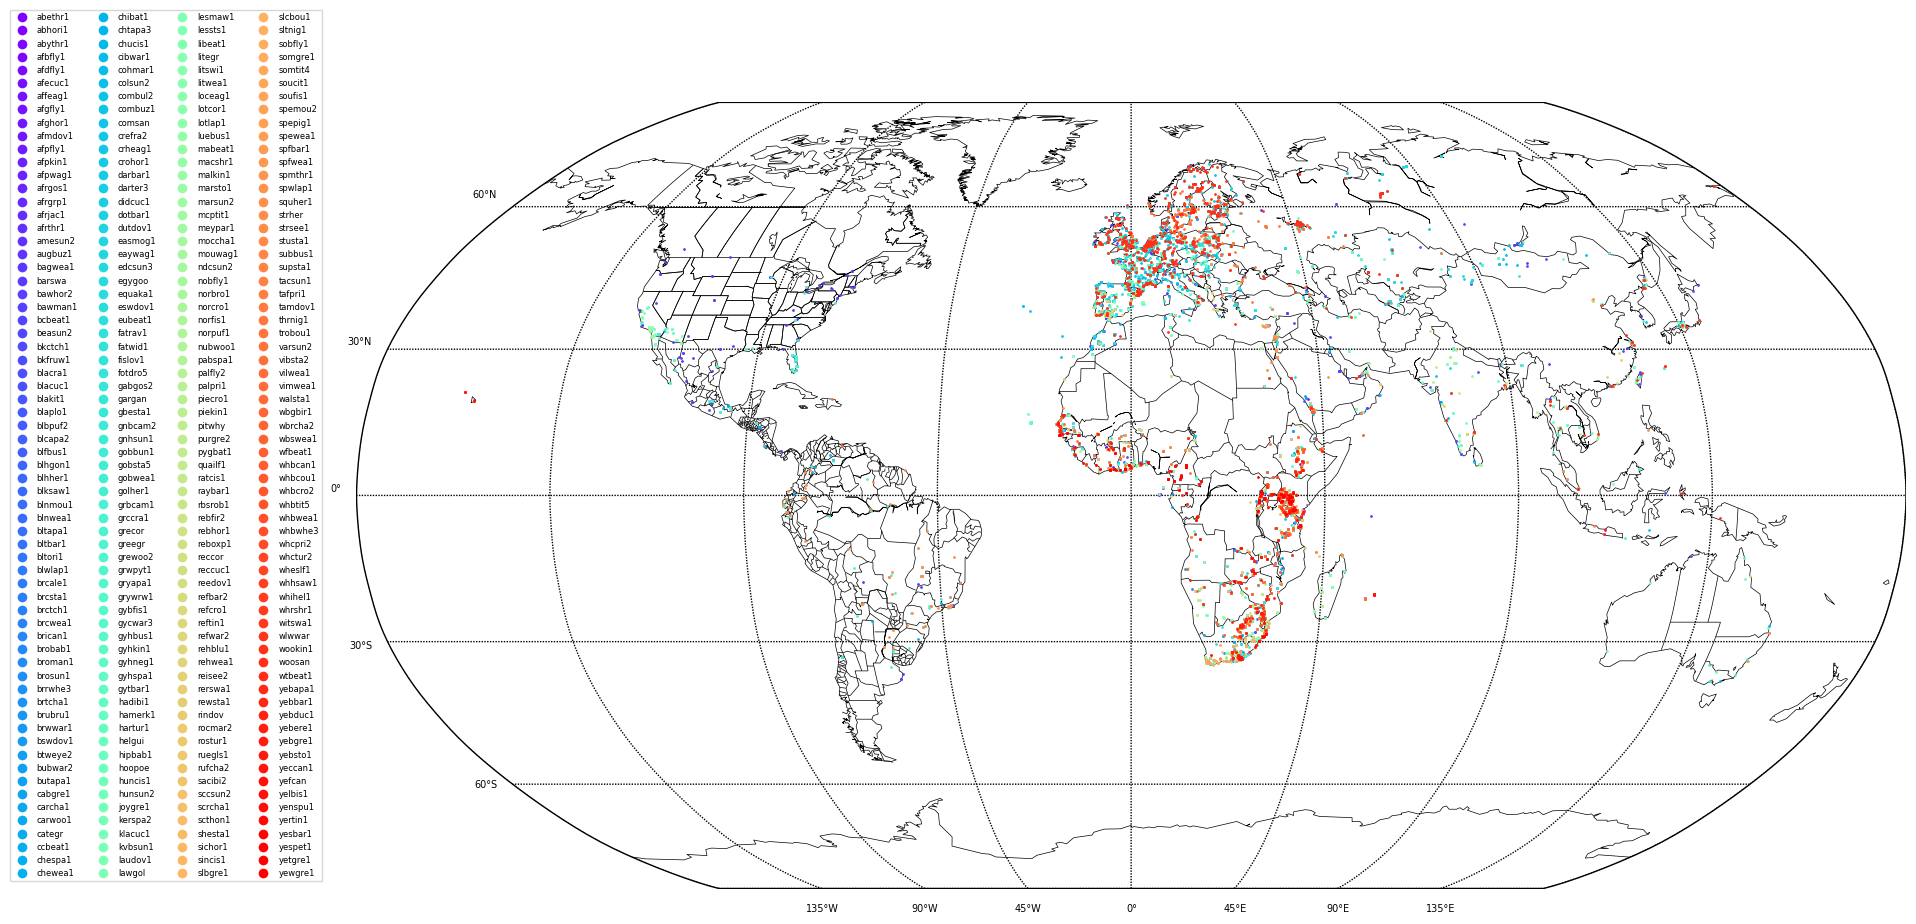

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib.lines import Line2D

csv_data = pd.read_csv('train_metadata.csv')
tag_names = np.unique(csv_data['primary_label'])

colors = plt.cm.rainbow(np.linspace(0, 1, len(tag_names)))
color_dict = {}
for i, name in enumerate(tag_names):
    color_dict[name] = colors[i]  # '#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])


fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0], fontsize=7)
m.drawmeridians(range(-180, 181, 45), labels=[0, 0, 0, 1], fontsize=7)


for i, class_name in enumerate(csv_data['primary_label']):

    x, y = m(csv_data['longitude'][i], csv_data['latitude'][i])
    m.plot(x, y, 'o', markersize=1, color=color_dict[class_name],label=class_name)


legend_elements = [ Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[name], markersize=8, label=name) for  name in tag_names]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=6, bbox_to_anchor=(0.03, 0.3))
plt.show()

# **3. Deep Learning Methods**

## **3.1 Motivation and justification**
We use several CNN models to process the frequency domain features of the given audio. Although CNNs are mainly used for computer vision tasks, they are also highly suitable for audio classification tasks. Here we use Mel-spectrogram as an examples to justify why we use CNN models: 

* Mel-spectrograms are time-frequency representations of audio signals and are visually similar to images, this allows the CNN's classification ability to be easily extended to grid-like data.
* Automatic hierarchical feature learning: CNNs are good at capturing both local and global audio patterns. In the lower layers of the network, CNNs capture local patterns such as edges and frequency bands, while higher layers capture more abstract and global features, such as shapes and harmonic structures. This hierarchical feature extraction is especially effective for Mel-spectrogram classification, where both local and global patterns contribute to meaningful representations of audio.
* Translation Invariance: CNNs inherently exhibit translation invariance due to the shared weights in the convolutional layers. This means that a pattern learned in one region of the Mel-spectrogram can be recognized in other regions. This is highly useful for audio classification tasks because meaningful patterns may occur at different time steps in the Mel-spectrogram.
* End-to-End Training: feature extraction and classification are integrated into a single training process, eliminating the need for manual feature engineering.
* Better performance: we show later that CNN's performance is much better than traditional methods, e.g., Logistic regression and SVM.
For these reasons, CNNs have become a popular and effective choice for classifying Mel-spectrograms and other time-frequency representations of audio signals.



## **3.2 Feature Preparation** (use Mel as an example)
Since we are using Mel spectrum as data format, converting audio to Mel can be time-consuming. Therefore, instead of on-the-fly processing, we opt to perform the conversion of audio to Mel spectrograms as an offline preprocessing step prior to training. The processed data is stored as pickle file in local disk and will be loaded as needed. 

Here are some information about our conversion: 
* Mel bins = 128, this is enough for most audio tasks.
* Sampling rate (SR): 32kHz, this is required by Kaggle official.
* Frequency upper limit: 16kHz, According to Nyquist's law, highest recognizable sound frequency is half of the sampling frequency
* Convert power to dB: the logarithmic scale of the Mel-spectrogram energy is more consistent with human ear perception

The pre-processed data consists of the following main fields which are used in our experiment:
* primary_label: the unique bird_name label.
* primary_label_idx: the unique bird_index label.
* mel: the converted mel spectrum, in numpy.array format.

**Code Implementation:**

Here is the code for generating the mel-spectrum from the given training audios (MFCC and chroma features can be generated in the same way).

In [ ]:
import pandas as pd
from collections import OrderedDict
import librosa,pickle
import  numpy as np
from tqdm import tqdm

# read train_metadata.csv
csv_data = pd.read_csv('train_metadata.csv')
sr = 32000

# convert csv to dict
data_dict=OrderedDict()
for col in csv_data.columns:
    data_dict[col]=csv_data[col].tolist()

# add key "mel" for storing mel
data_dict['mel'] = [0] * len(data_dict['primary_label'])

# convert audio to mel (THIS COSTS ~1 HOUR)
for idx, ogg_path in tqdm(enumerate(data_dict['filename'])):
    x, sr = librosa.load(f"train_audio/{ogg_path}", sr=sr)
    m = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmin=0, fmax=sr//2)
    m = librosa.power_to_db(m).astype(np.float32)
    data_dict['mel'][idx] = m

# assign number_id to each bird, stored in a dict name_label_2_int_label, i.e., name_label_2_int_label['bird_name'] = id
bird_names, _ = np.unique(data_dict['primary_label'], return_counts=True)
name_label_2_int_label = {}
for idx, k in enumerate(bird_names):
    name_label_2_int_label[k] = idx

# add key "primary_label_idx" for saving primary_label in num_id format
primary_label_idx=[0]*len(data_dict['primary_label'])
for i, tmp in enumerate(data_dict['primary_label']):
    primary_label_idx[i] = name_label_2_int_label[tmp]

# add key "secondary_label_idx" for saving secondary_label in num_id format
import ast
secondary_label_idx=[0]*len(data_dict['primary_label'])
for i, tmp in enumerate(data_dict['secondary_labels']):
    if tmp == '[]':
        secondary_label_idx[i] = []
    else:
        tmp_label_list = ast.literal_eval(tmp)
        secondary_label_idx[i] = [name_label_2_int_label[p] for p in tmp_label_list]

# save our data dict into pickle file (~22GB)
with open("train_mel(dB,sr=32k,bin=128).pickle3", 'wb') as file:
    pickle.dump(data_dict, file)

## **3.3 Training Description**
So far we have obtained mel-spectrum, MFCC, and chroma feature. They have been saved to our local disk. This section presents our training details, the overall training pipeline is shown below: 

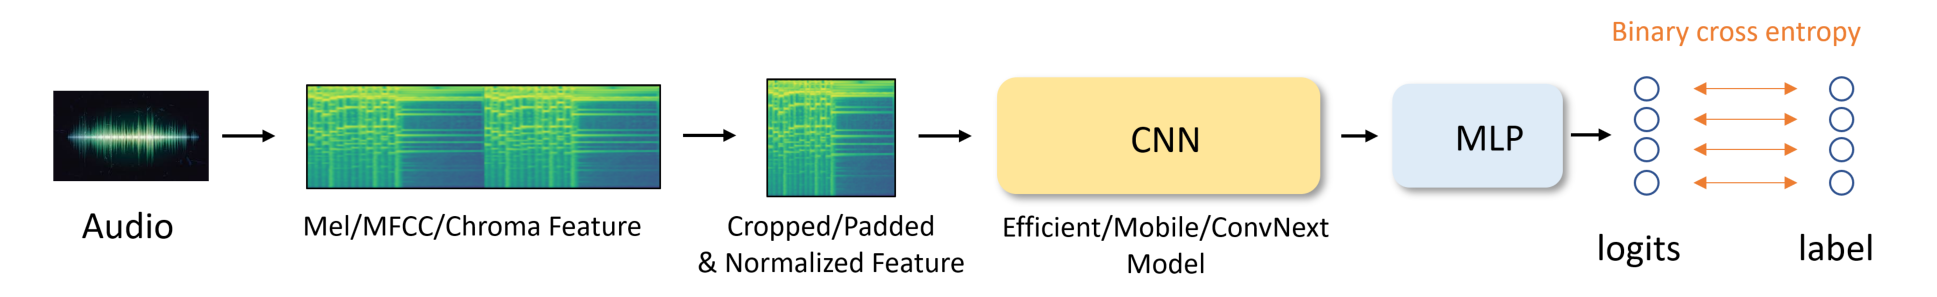



#### **3.3.1 Train/val set split: Rare classes handling** 
This is a simple histogram statistic of the count on each bird category (note that the vertical axis is on a logarithmic scale).

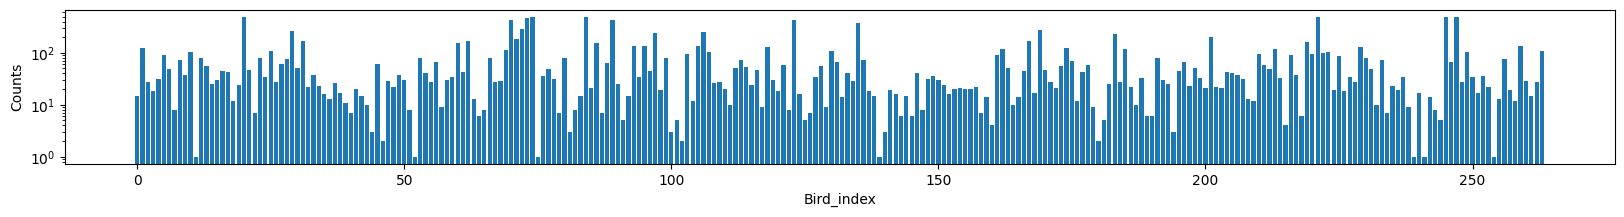

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
csv_data = pd.read_csv('train_metadata.csv')
primary_labels = csv_data['primary_label']
bird_names, c = np.unique(primary_labels, return_counts=True)
fig = plt.figure(figsize=(20,2))
plt.bar(list(range(len(c))), c)
plt.yscale('log')
plt.xlabel('Bird_index')
plt.ylabel('Counts')
plt.show()

In practice, when splitting the dataset into training (80%) and validation (20%) sets, we found that for some relatively rare categories (e.g., 'afpkin1', 'brtcha1', 'crefra2 ...), due to their limited number of samples, there exits the possibility that some of them may only appear in the validation set but are missing in training set. Such an imbalance would result in the model being unable to learn features from these samples. To address this issue, we conducted an explicit inspection of the training and validation sets after splitting. We identified samples that were exclusively present in the validation set and incorporated them into the training set to ensure that the model could learn their features as much as possible.



#### **3.3.2 Data padding & clipping & normalization**
Since the official test rule requires to predict each class's probability over 5-second audio clip, to make the model better adapt to this setting,  we also need to make the length of each training sample to be equivalent to 5-second long audio. Since the sampling rate is 32kHz, so the sampled 5-second audio should have 32000x5 points. Also, the hop length of Short-time Fourier Transform is 512, so the frequency-domain feature map should have the length of $5s*32000Hz/512 = 313$. This is applicable to Mel-spectrum, MFCC and chroma features.

* If feature map's length is larger than 313, we randomly crop a 313-wide subsection.
* If feature map's length is less than 313, we repeat the sample until it reaches 313.

As a result, each mel-spectrum image is in size of 128(bins)x313. Similarly, each MFCC image is in size of 20(bins)x313, each chroma map is in size of 12(keys)x303.

After padding & clipping, we also we apply the normalization on data as follows:
$$ X' = \frac{X-mean(X)}{std(X)}$$
$$ X'' = \frac{X'-min(X')}{max(X')-min(X')}$$
This helps to make the data in consistent scale, facilitate faster converge and improve generalization ability of the network



#### **3.3.3 Data augmentation**
We use data mix-up as the augmentation technique, which can generate additional training samples by linearly interpolating between pairs of existing samples and their corresponding labels:
* For sample: $x_{new} = x_1 + (1-\lambda) x_2$
* For label: $y_{new} = y_1 + (1-\lambda) y_2$

The mix-up technique can be useful for preventing overfitting and improving the robustness of the model, especially when there is limited training data. Mix-up encourages the model to learn more smooth and flexible decision boundaries. We set $\lambda = 0.2$ according to prior experience.


#### **3.3.4 Cross-validation for feature selection**
To determine which feature representation performs better, using EfficientNet_b2, we conduct 5-fold cross-validation experiment on mel-spectrum, MFCC, and chroma feature, respectively. The results are plotted in the following figure (Note, we present results here first, the implementation code can be found in Section 3.4.2):

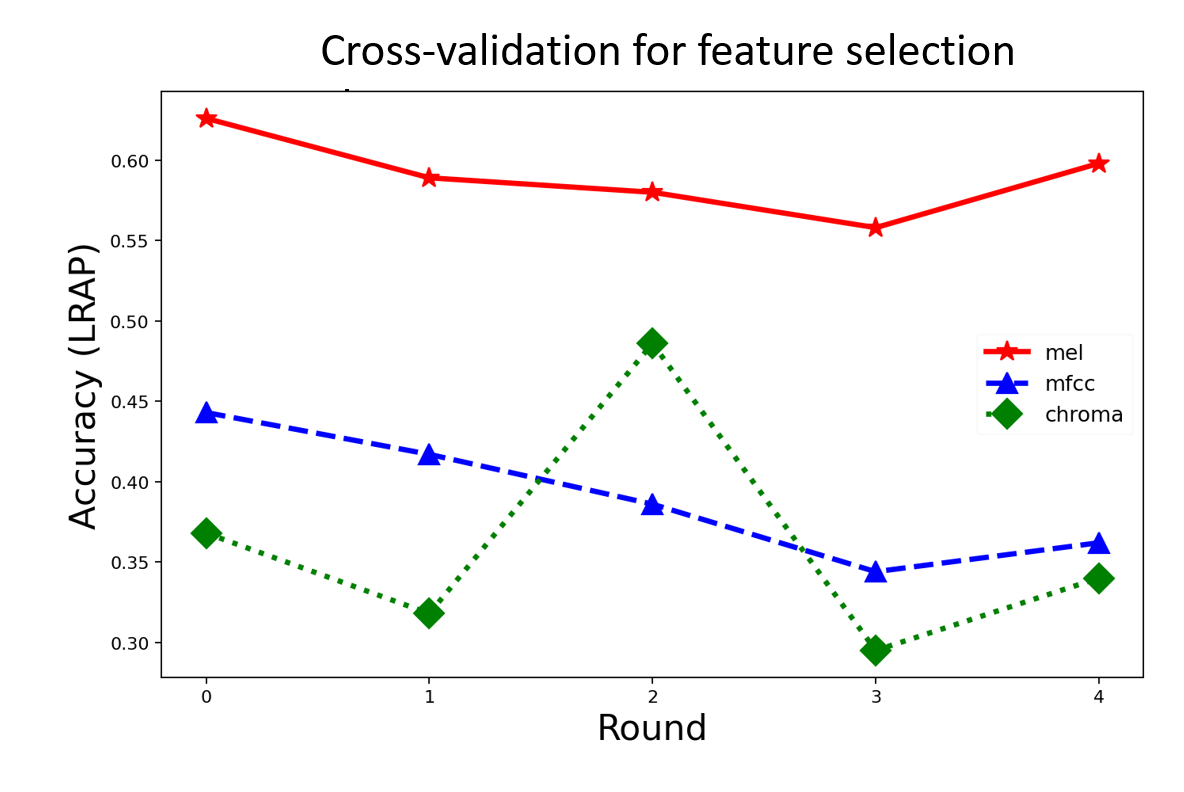

The x-axis is the validation fold index and the y-axis is the best label ranking average precision score (LRAP) in each round. The LRAP is computed as follows:
$$
s = \frac{1}{n} \sum_{i=1}^n p_i \\
p_i = \frac{1}{m-1} \sum_{j\ne i} \mathbb{I}(r_{ij} < r_{ii})
$$
where $n$ is the number of samples, $m$ is the number of classes, $s$ is the LRAP score, $p_i$ is the precision of class $i$, $r_{ij}$ is the rank of class $i$ relative to class $j$, $\mathbb{I}$ is the indicator function.

We also present more detailed validation accuracy for each feature, and each validation fold index during the training process as follows:

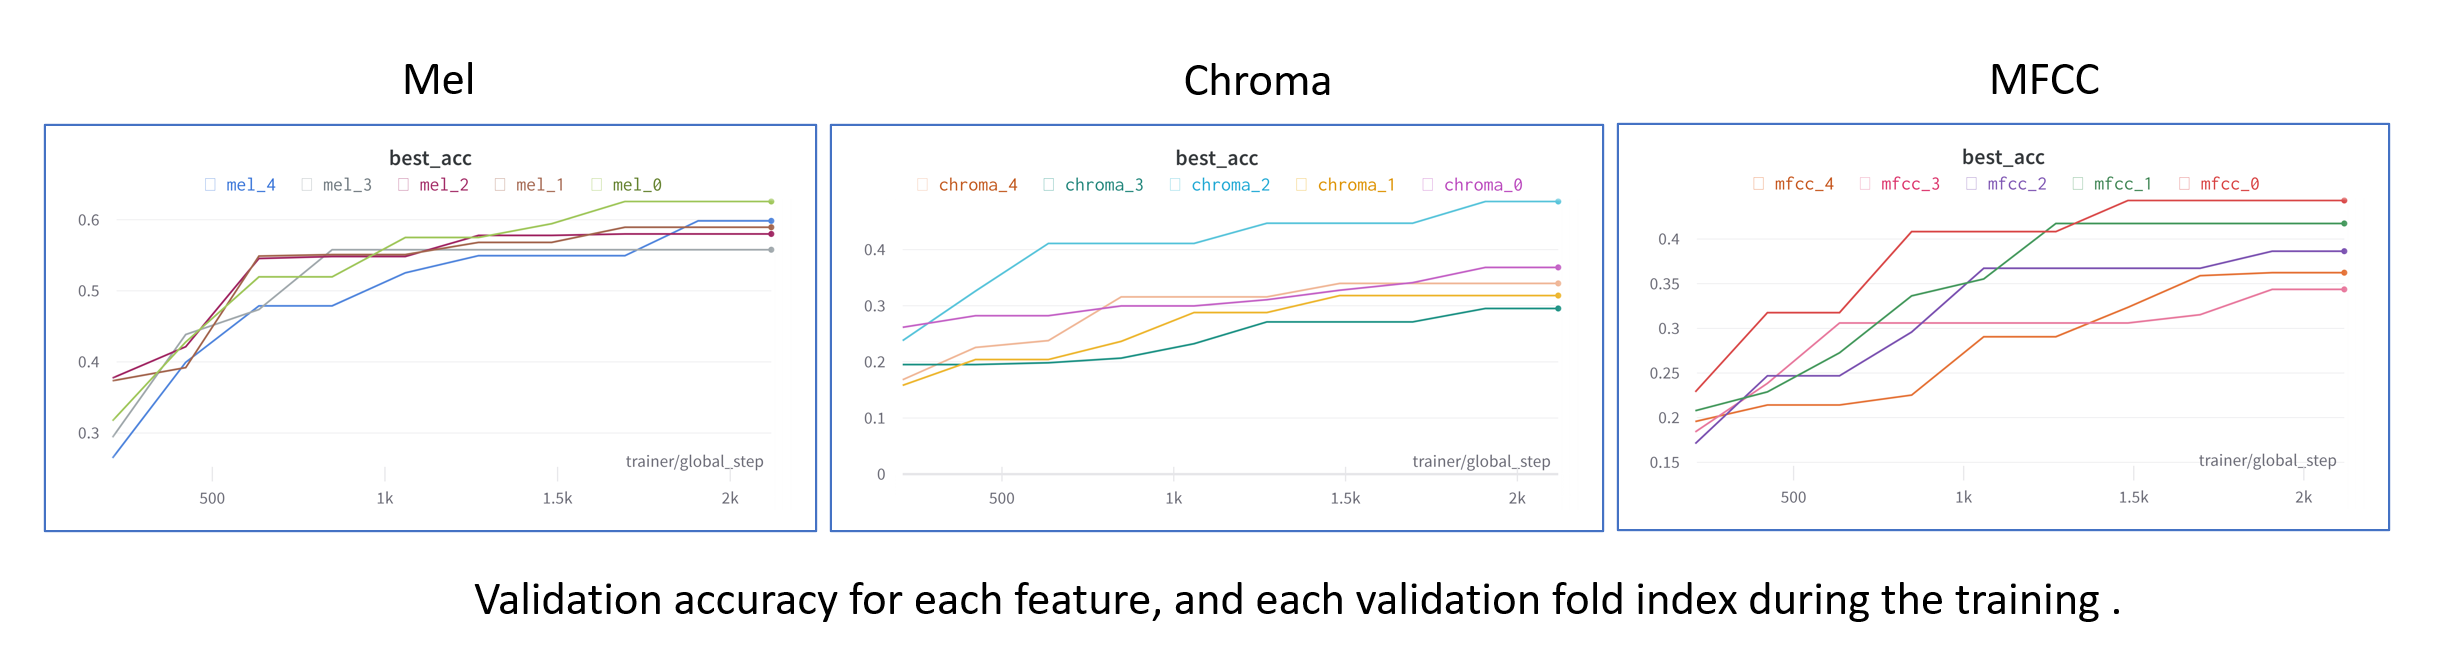

 **Conclusion**: As can be seen, using Mel-spectrum yields the best individual and overall performance.

 **Explanation**:  We conjecture the reasons why using mel-spectrum as data representation performs better than MFCC and chroma feature as follows:
* Mel-spectrum has richer information, it captures the distribution of energy across different frequency bands over time, thus retains more detailed spectral information. Since bird calls can vary greatly in terms of pitch, duration, and intensity. 
* In contrast, MFCC provides a compact representation of the spectral envelope and may lose some of the nuances that are important for classifying bird calls. Chroma features focus on tonal and harmonic content, which may not capture the full complexity of bird vocalizations.
* Mel-spectrum is robust to background noise, we listened to some sound samples and found that bird call recordings are collected in natural environments with a large extent of background noise and other sounds. These disturbing component might be easier to be differentiate in Mel-spectrum than more-compressed MFCC and chroma features.




#### **3.3.5 Cross-validation for model selection**
So far, we know that Mel-spectrum is the best data representation. Now we again conduct 5-fold cross-validation for model selection, using the Mel-spectrum only. We attempted three different CNN models (Note, we present results here first, the implementation code can be found in Section 3.4.3):

* EfficientNet b2: a member of the EfficientNet family of models, well-known for its efficient architecture scaling. It has 9.2M parameters, 94.9% top-5 accuracy, 79.8% top-1 accuracy on ImageNet-1k.
* MobileNet v3-small: uses lightweight depthwise separable convolutions and squeeze-and-excitation blocks. 2.5M parameters, 69.7% top-1, 87.4% top-5 accuracy on ImageNet-1k.
* Convnext tiny: introduces conditional convolutions to increase the model capacity while maintaining computational efficiency. It has 28M parameters, 82.5% top-1 accuracy, 96.1% top-5 accuracy on ImageNet-1k.

Additionally, we also tried a transformer-based method Swin transformer. However, this is not included in our cross-validation experiment due to the time-consuming training process. 


The cross-validation results of different models are plotted in the following figure:

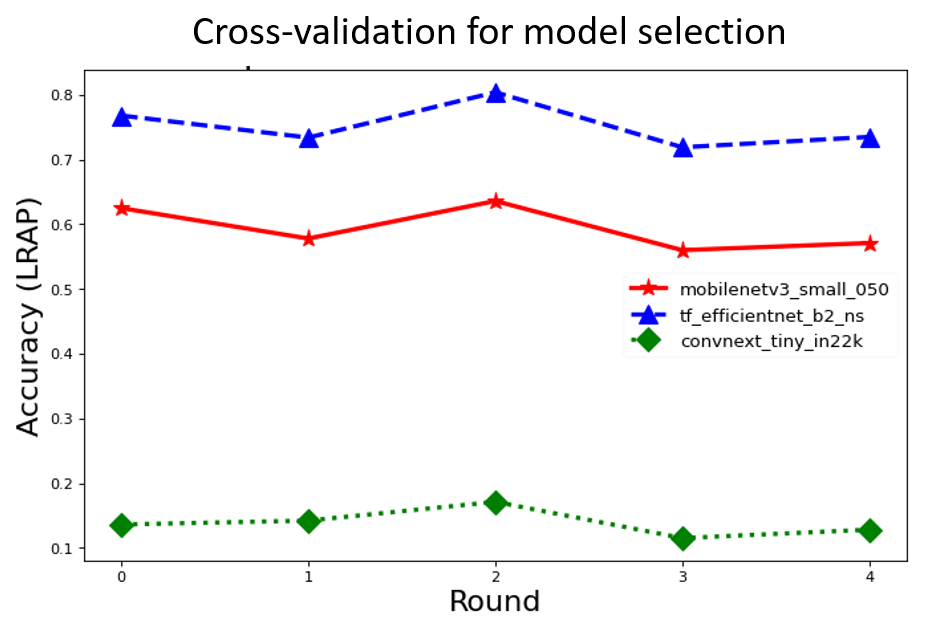

where the x-axis is the fold index and the y-axis is the best label ranking average precision score (LRAP) in each round. 

We also present more detailed validation accuracy for each model, and each validation fold index (except Swin-T) during the training process as follows:

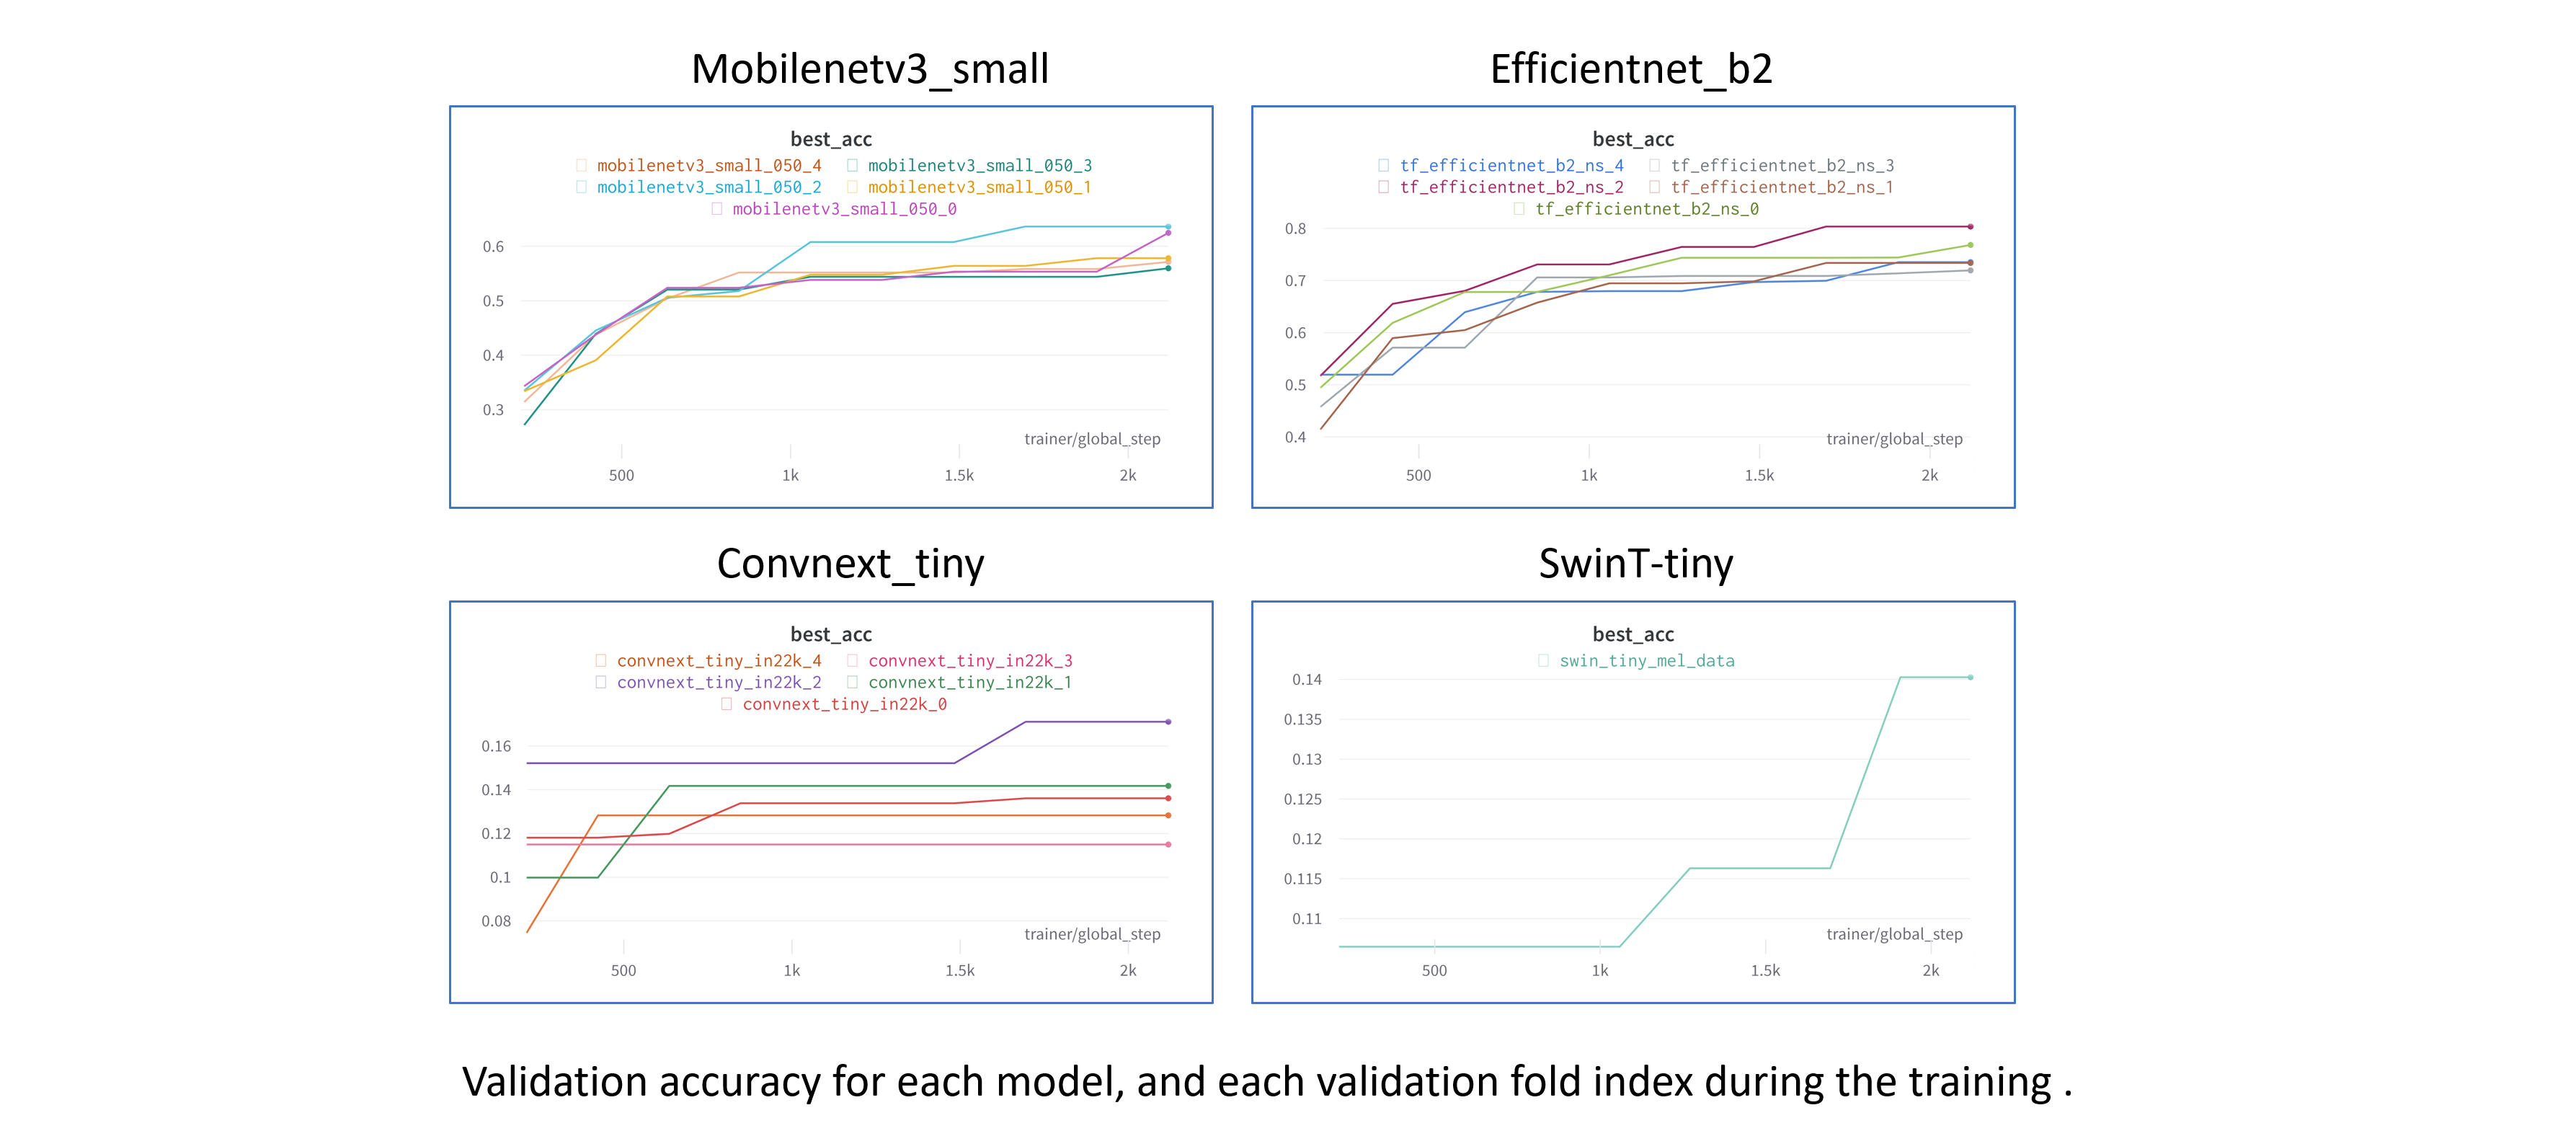

Here is the loss curve with respect to iteration for each model (except Swin-T) during the training process:

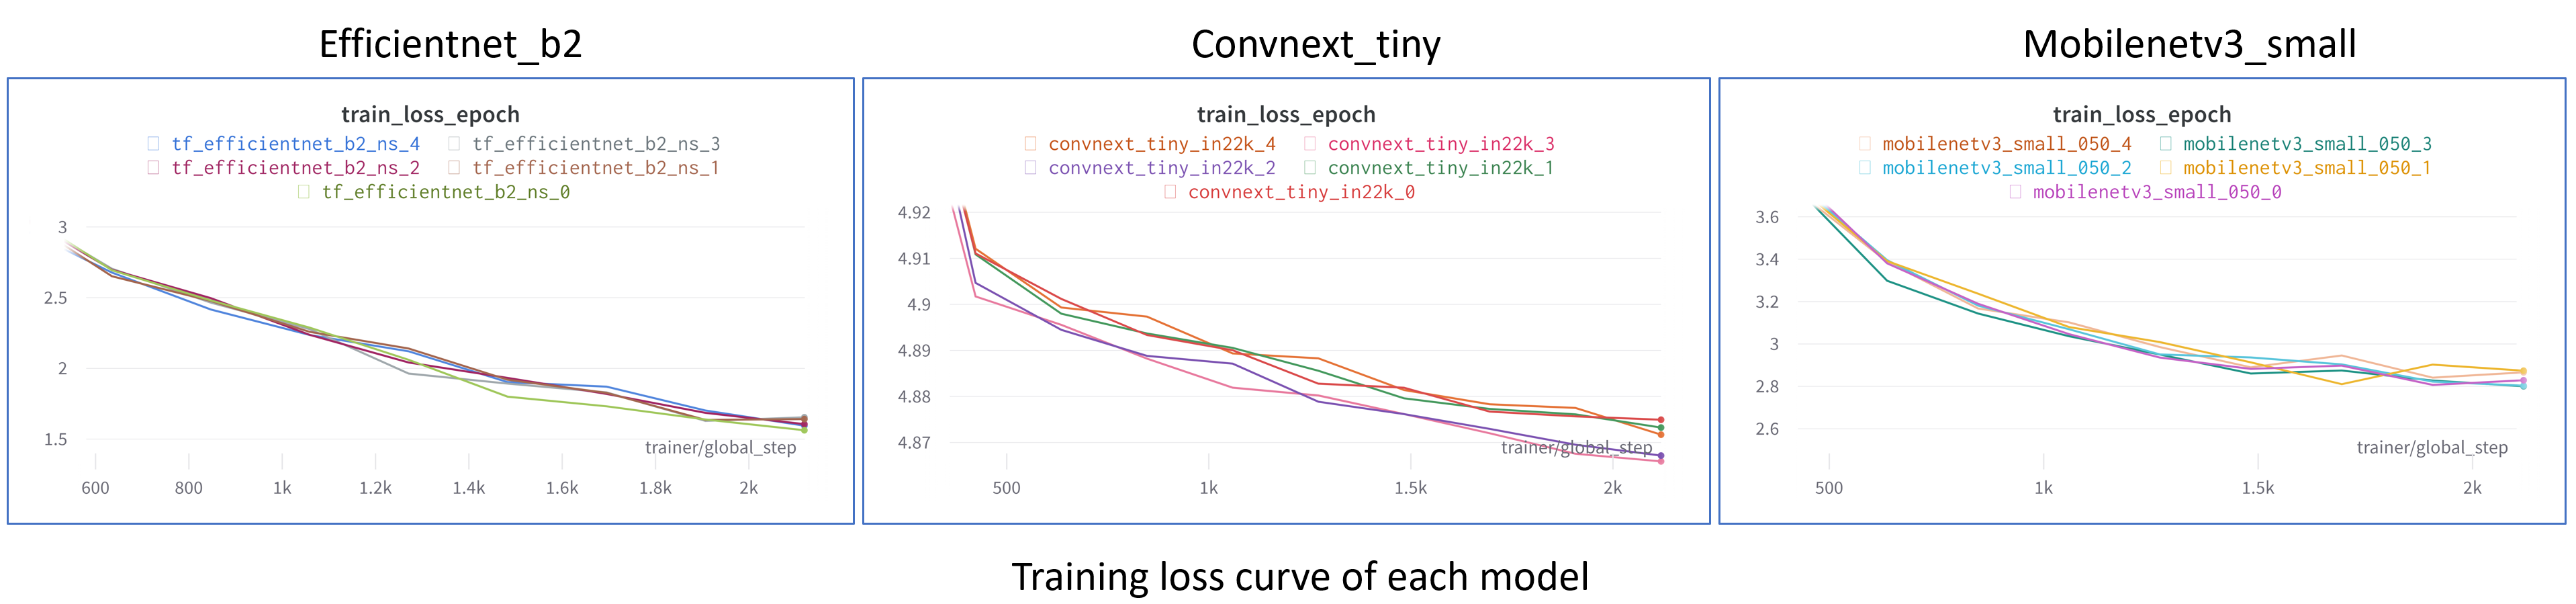


**Conclusion**: As can be seen, using EfficientNet-b2 yields the best individual and overall performance. 

 **Explanation**: Though EfficientNet-b2 is designed to achieve high accuracy with relatively fewer parameters and computational requirements and is the most popular CNN backbones in computer vision. Our experiment also demonstrates such finding. However, it's still not easy to theoretically explain the exact reason why EfficientNet-b2 outperforms mobileNetV3-small and Convnext-tiny in our task. We conjecture the possible cause as follows:
* EfficientNet uses neural architecture search (NAS) to automatically search for neural network architectures with the goal of finding a high-performance neural network structure for a given task and dataset. 
* A key feature of EfficientNet is it scales depth, width, and resolution simultaneously and determines an appropriate scaling factor through grid search to balance the model's capacity and computational complexity.
* The hyper-parameters used in our experiment benefits the EfficientNet most.




#### **3.3.6 Cross-validation for learning rate selection**

Now we choose EfficientNet-b2 model and use Mel-spectrum as feature representation. Next we conduct 5-fold cross-validation for learning rate selection. We attempted 4 different learning rates: 5e-2, 5e-3, 5e-4, 5e-5. (Note, we present results here first, the implementation code can be found in Section 3.4.4):

The cross-validation results of different learning rates are plotted in the following figure:

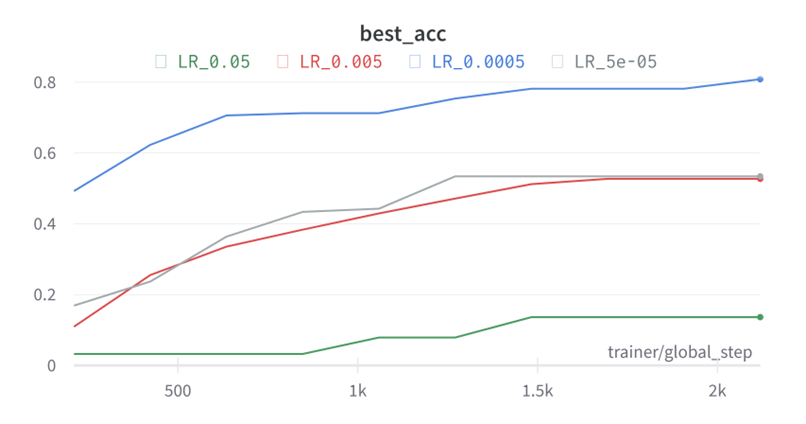

As can be seen, setting learning rate to 5e-4 has the best overall results.

## **3.4 Experiment**
We provide our full training code here. We implement our training using pytorch lighting, on a linux server with RTX3090 and 512GB RAM.



### **3.4.1 Main Training Code**

#### Import packages

In [ ]:
# import os
import gc
import random
import timm
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts #, ReduceLROnPlateau, OneCycleLR, CosineAnnealingLR

import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint , EarlyStopping

import wandb
import albumentations as A
from torchtoolbox.tools import mixup_data, mixup_criterion
import soundfile as sf
from sklearn import *
import pickle

import warnings
warnings.filterwarnings('ignore')


#### Set up config files 

In [ ]:

# Define a config dictionary object
config = {
    'use_aug': False,
    'num_classes': 264,
    'PRECISION': 16,    
    'PATIENCE': 10,    
    'seed': 2023,
    'pretrained': True,            
    'weight_decay': 1e-3,   
    'DEVICE': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),    
    'data_root': './',   
    'SR': 32000,
    'DURATION': 5,
    'MAX_READ_SAMPLES': 5,
    'save_path': './exp1/',
    'bird_name_path': 'bird_names.pickle3',
    'mel_file_path': 'train_mel(dB,sr=32k,bin=128).pickle3',
    'mfcc_file_path': 'train_mfcc(n=20).pickle3',
    'chroma_file_path': 'train_chroma(k=12).pickle3',
    'verbose':False,
    'random_state':42,
    'k_fold': 5,
    'val_fold_idx':0,
    'LR': 5e-4,
    'use_mixup': True,
    'mixup_alpha': 0.2,
    'batch_size': 64,
    'epochs': 10,
    'model': 'tf_efficientnet_b2_ns',
    'exp_name':'base'
}

# Pass the config dictionary when you initialize W&B
wandb.init(project="Bird", config=config, name='base')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yuhaoliu (iccd). Use `wandb login --relogin` to force relogin


In [ ]:
pl.seed_everything(wandb.config['seed'], workers=True)

Global seed set to 2023


2023

In [ ]:
def load_pickle(fname):
    f = open(fname, 'rb')
    out = pickle.load(f)
    f.close()
    return out


#### Setup optimizer

In [ ]:

def get_optimizer(lr, params):
    model_optimizer = torch.optim.Adam(
            filter(lambda p: p.requires_grad, params), 
            lr=lr,
            weight_decay=wandb.config['weight_decay']
        )
    interval = "epoch"
    
    lr_scheduler = CosineAnnealingWarmRestarts(
                            model_optimizer, 
                            T_0=wandb.config['epochs'], 
                            T_mult=1, 
                            eta_min=1e-6, 
                            last_epoch=-1
                        )

    return {
        "optimizer": model_optimizer, 
        "lr_scheduler": {
            "scheduler": lr_scheduler,
            "interval": interval,
            "monitor": "val_loss",
            "frequency": 1
        }
    }

#### Setup dataset
This section includes fetching data from disk, train/val splitting, rare class handling, feature crop/pad, and feature normalization as described previously.

In [ ]:
class MyDataset(Dataset):
    def __init__(self, data, mode, data_indices=None, k_fold=wandb.config['k_fold'], val_fold_idx=0, random_state=42):
        assert mode in ['train',  'val'], f'invalid mode {mode}!, mode must be [train | val]'
        self.mode = mode

        self.name_label_2_int_label = load_pickle("name_label_2_int_label.pickle3")  # a dict which saves mapping from

        self.data = data
        self.prefix = list(data.keys())[-3]
        self.val_fold_idx = val_fold_idx
        self.random_state = random_state

        self.k_fold = k_fold

        if data_indices is None:
            data_indices = list(range(data['primary_label_idx']))
            random.seed(self.random_state)
            random.shuffle(data_indices)

        self.val_indices = data_indices[self.val_fold_idx*len(data_indices)//self.k_fold: (self.val_fold_idx+1)*len(data_indices)//self.k_fold]  # 分为k_fold份，第val_fold_idx子份作为验证集
        self.train_indices = [idx for idx in data_indices if idx not in self.val_indices]  # 其余作为训练集

        train_labels = [data['primary_label'][i] for i in self.train_indices]
        val_labels = [data['primary_label'][i] for i in self.val_indices]
        missing_labels = list(set(val_labels)-set(train_labels)) # labels in val set but not in train set

        val_indices_copy = self.val_indices.copy()
        for i, val_idx in enumerate(val_indices_copy):
            if data['primary_label'][val_idx] in missing_labels:  # if a sample's label is in val set but not in train set
                self.train_indices.append(self.val_indices.pop(i))  # then we shift it from val set to train set

    def __getitem__(self, index):

        if self.mode == 'train':
            feat_inp = self.data[self.prefix][self.train_indices[index]]
            label = torch.tensor(self.data['primary_label_idx'][self.train_indices[index]])
            # label = self.name_label_2_int_label[self.label[index]]  # 'bird name' -> idx

        elif self.mode == 'val':
            feat_inp = self.data[self.prefix][self.val_indices[index]]
            label = torch.tensor(self.data['primary_label_idx'][self.val_indices[index]])

        feat_inp = self.crop_or_pad(feat_inp)
        feat_inp = self.normalize(feat_inp)
        feat_inp = torch.from_numpy(feat_inp).unsqueeze(0).float()
        feat_inp = feat_inp.repeat(3,1,1)
        label = torch.nn.functional.one_hot(label, num_classes=264).float()

        return feat_inp, label



    def __len__(self):
        if self.mode == 'train':
            return len(self.train_indices)
        elif self.mode == 'val':
            return len(self.val_indices)
        
    def crop_or_pad(self, m, th=313):  # 313=5s*32000Hz/512
        length = m.shape[1]
        if length <= th: # pad short
            while m.shape[1] < th:  # repeat padding until th
                m = np.concatenate([m, m],axis=1)
            m = m[:,0:th]
        else:  # crop longer audio
            start = np.random.randint(length - th)
            m = m[:,start:start+th]
        return m #torch.from_numpy(m).unsqueeze(0)

    def normalize(self, X, eps=1e-6, mean=None, std=None):
        mean = mean or X.mean()
        std = std or X.std()
        X = (X - mean) / (std + eps)
        
        _min, _max = X.min(), X.max()

        if (_max - _min) > eps:
            V = np.clip(X, _min, _max)
            V = (V - _min) / (_max - _min)
        else:
            V = np.zeros_like(X)

        return V
    

#### Setup model
This block defines 4 different models we have attempted: 

In [ ]:
class BirdClefModel(pl.LightningModule):
    def __init__(self, model_name=wandb.config['model'], num_classes = wandb.config['num_classes'], pretrained = wandb.config['pretrained']):
        super().__init__()
        self.num_classes = num_classes
        self.backbone = timm.create_model(model_name, pretrained=pretrained)
        self.model_name = model_name
        
        if 'efficientnet' in model_name or 'mobilenet' in model_name:
            self.in_features = self.backbone.classifier.in_features
            self.backbone.classifier = nn.Sequential(
                nn.Linear(self.in_features, num_classes),
                nn.Dropout(0.4),
                nn.Linear(self.num_classes, num_classes))
        elif 'convnext' in model_name:
            self.in_features = self.backbone.head.fc.in_features
            self.backbone.head.fc = nn.Sequential(
                nn.Linear(self.in_features, num_classes),
                nn.Dropout(0.4),
                nn.Linear(self.num_classes, num_classes))
        elif 'swin' in model_name:
            self.in_features = self.backbone.head.in_features
            self.backbone.head =  nn.Linear(self.in_features, num_classes)
        
        else:
            raise('No valid model name')
                
        self.loss_function = nn.BCEWithLogitsLoss()
        self.global_acc = 0 

    def forward(self,images):
        if 'swin' in self.model_name:
            # for mel data, the original data size (h & w) is [128, 313]
            images = F.interpolate(images, (224, 224))

        logits = self.backbone(images)
        return logits
        
    def configure_optimizers(self):
        return get_optimizer(lr=wandb.config['LR'], params=self.parameters())

    def train_with_mixup(self, X, y):
        X, y_a, y_b, lam = mixup_data(X, y, alpha=wandb.config['mixup_alpha'])
        y_pred = self(X)
        loss_mixup = mixup_criterion(F.cross_entropy, y_pred, y_a, y_b, lam)
        return loss_mixup

    def training_step(self, batch, batch_idx):
        image, target = batch        
        if wandb.config['use_mixup']:
            loss = self.train_with_mixup(image, target)
        else:
            y_pred = self(image)
            loss = self.loss_function(y_pred,target)
        
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss        

    def validation_step(self, batch, batch_idx):
        image, target = batch     
        y_pred = self(image)
        val_loss = self.loss_function(y_pred, target)
        
        self.validation_step_outputs = {"val_loss": val_loss, "logits": y_pred, "targets": target}
        self.log("val_loss", val_loss,  on_epoch=True, prog_bar=True)
        
        return self.validation_step_outputs

    
    def train_dataloader(self):
        return self._train_dataloader 
    
    def validation_dataloader(self):
        return self._validation_dataloader
    
    def on_validation_epoch_end(self):

        avg_loss = self.validation_step_outputs['val_loss'].mean()
        output_val = self.validation_step_outputs['logits'].sigmoid().cpu().detach().numpy()
        target_val = self.validation_step_outputs['targets'].cpu().detach().numpy()

        avg_score = sklearn.metrics.label_ranking_average_precision_score(target_val,output_val)

        self.log('val_accuracy', avg_score)
        if avg_score > self.global_acc:
            self.global_acc = avg_score
            self.log('best_acc', avg_score)
        else:
            self.log('best_acc', self.global_acc)



        self.validation_step_outputs.clear()  # free memory
        
        return {'val_loss': avg_loss,'val_cmap':avg_score}    
    
    
    

#### Trainer launcher
This is the entrypoint of the training loop.

In [ ]:


def train(data):
    # define the logger
    logger = WandbLogger(project='Bird2023', log_model="all", name=wandb.config['exp_name'])

    # define the dataset and dataloader
    data_indices = list(range(len(data['primary_label'])))
    random.seed(42)  # do not change this otherwise the split will be different
    random.shuffle(data_indices)  # a shuffled list containing data indices (for data split)

    train_dataset = MyDataset(data=data, 
                              mode='train',
                              data_indices = data_indices,
                              val_fold_idx=wandb.config['val_fold_idx'], 
                              random_state=wandb.config['random_state'])
    val_dataset = MyDataset(data=data,  
                            mode='val',
                            data_indices = data_indices,
                            val_fold_idx=wandb.config['val_fold_idx'], 
                            random_state=wandb.config['random_state'])
    
    train_dataloader = DataLoader(dataset=train_dataset, batch_size=wandb.config['batch_size'], shuffle=True, pin_memory=True)
    val_dataloader = DataLoader(dataset=val_dataset, batch_size=wandb.config['batch_size'], shuffle=False, pin_memory=True, drop_last=False)

    # define the model
    audio_model = BirdClefModel(model_name=wandb.config['model'])

    # define callbacks
    early_stop_callback = EarlyStopping(monitor="val_accuracy", min_delta=0.00, patience=wandb.config['PATIENCE'], verbose= wandb.config['verbose'], mode="max")
    checkpoint_callback = ModelCheckpoint(dirpath=wandb.config['save_path'],
                                            save_top_k=1,
                                            save_last= True,
                                            save_weights_only=False,
                                            filename= f'./{wandb.config["model"]}_loss',
                                            verbose= wandb.config['verbose'],
                                            monitor='val_accuracy',
                                            mode='max',
                                            auto_insert_metric_name = True)
    callbacks_to_use = [checkpoint_callback, early_stop_callback]

    # define the trainer
    trainer = Trainer(
        val_check_interval=1.0,
        deterministic=True,
        max_epochs=wandb.config['epochs'],
        logger=logger,   
        callbacks=callbacks_to_use,
        precision=wandb.config['PRECISION'], accelerator="gpu",
        devices=[7],
        num_sanity_val_steps=0 
    )

    # conduct train and test
    trainer.fit(audio_model, train_dataloaders = train_dataloader, val_dataloaders = val_dataloader)
 

### **3.4.2 Cross-validation for feature selection**
This section shows 5-fold cross-validation experiment on 3 features: 'chroma', 'mel', 'mfcc', using the same CNN model is 'mobilenetv3_small_050' .

First, we load three types of pre-computed features:

In [ ]:

mel_data = load_pickle(config['mel_file_path'])  # see ogg2mel for how to convert ogg to mel_dict.pickle3
mfcc_data = load_pickle(config['mfcc_file_path']) 
chroma_data = load_pickle(config['chroma_file_path']) 

bird_names, _ = np.unique(mel_data['primary_label'], return_counts=True)


Now, run the experiment in nested for-loop. The outer loop traverses the feature type while the inner loop traverses the validation fold index. The statistics are automatically saved via wandb.

In [ ]:
# For feature selection.

prefix_list = ['chroma', 'mel', 'mfcc']    
data_dict = {'mel': mel_data, 'mfcc': mfcc_data, 'chroma': chroma_data}

config['model'] = 'mobilenetv3_small_050' 
# We use mobilenet to conduct the ablated experiments for the feature selection, by default.
acc_comp_of_feats = {}
for each_prefix in prefix_list:
    ablated_feat_data = data_dict[each_prefix]
    acc_list = []*config['k_fold']

    for idx_round in range(config['k_fold']):
        new_exp_name = each_prefix + '_' + str(idx_round)
        config['exp_name'] = new_exp_name
        config['val_fold_idx'] = idx_round
        wandb.init(project="Bird", config=config, name=new_exp_name)
        
        wandb.config['epochs'] = 10 # for test
        train(ablated_feat_data)

        current_best_acc = round(wandb.run.summary['best_acc'], 3)
        wandb.finish()

        acc_list.append(current_best_acc)
    acc_comp_of_feats[each_prefix] = acc_list 



Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

#### Plot averaged cross-validation results of different features.


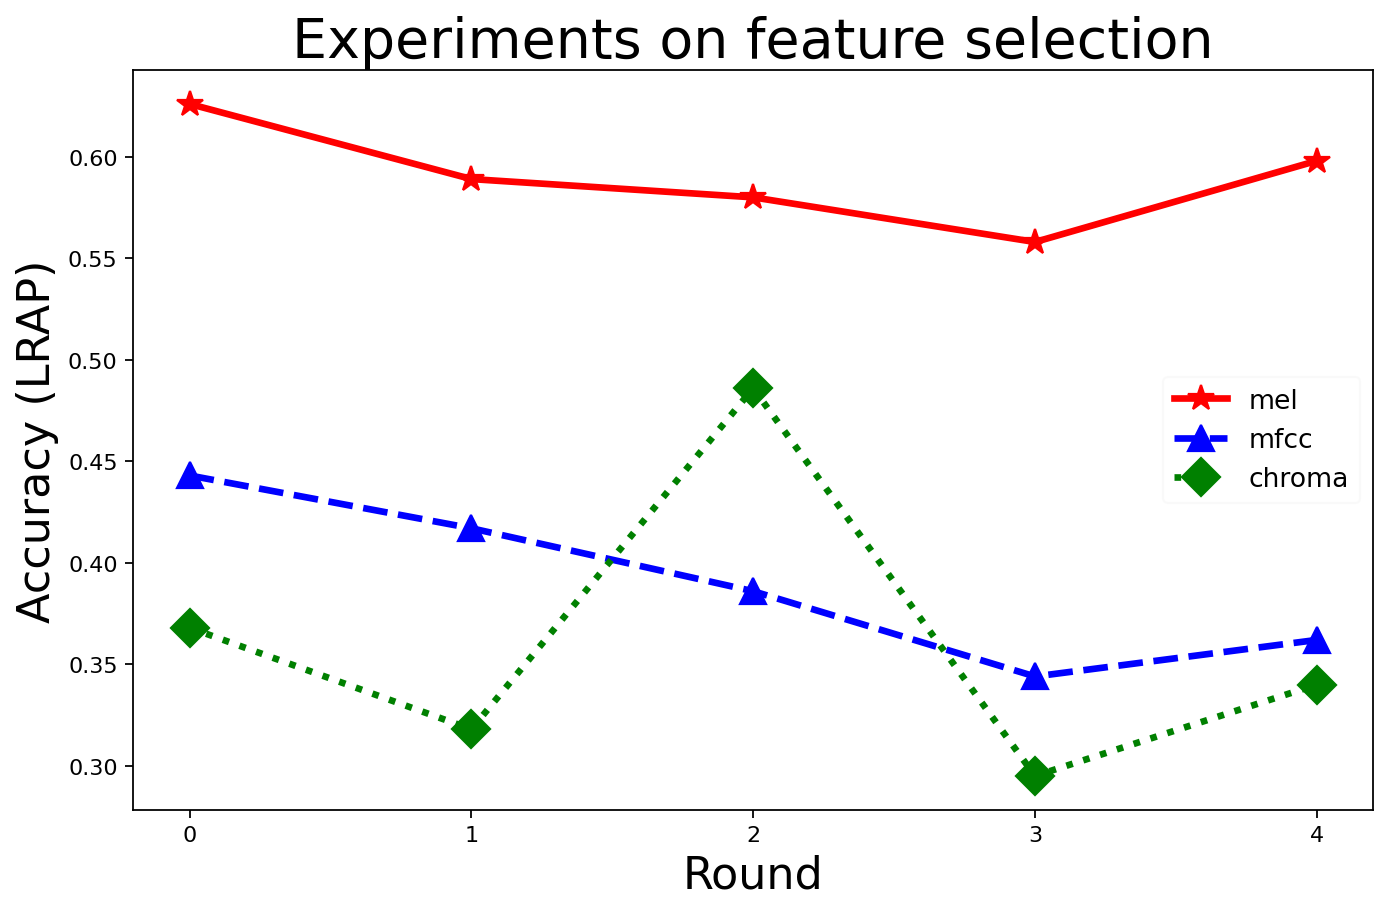

In [ ]:

x = np.array([0,1,2,3,4])

plt.figure(figsize=(10,6), dpi=160)  # 设置分辨率

plt.plot(x, acc_comp_of_feats['mel'], 'r-*', linewidth=3, markersize=12, label='mel')  
plt.plot(x, acc_comp_of_feats['mfcc'], 'b--^', linewidth=3, markersize=12, label='mfcc')   
plt.plot(x, acc_comp_of_feats['chroma'], 'g:D', linewidth=3, markersize=12, label='chroma')
plt.legend(loc=0, fontsize=12, framealpha=0.1)   
plt.xticks(x, ['0', '1', '2', '3', '4'])  # 

plt.xlabel('Round', fontsize=20)         
plt.ylabel('Accuracy (LRAP)', fontsize=20)      
plt.title('Experiments on feature selection', fontsize=25)    
plt.show()

### **3.4.3 Cross-validation for model selection**

This section shows 5-fold cross-validation experiment on 3 CNN models:  'mobilenetv3_small_050', 'tf_efficientnet_b2_ns', 'convnext_tiny_in22k'. Using the Mel feature as it's the best feature.

We run the experiment in nested for-loop. The outer loop traverses the model type while the inner loop traverses the validation fold index. The statistics are automatically saved via wandb.

In [ ]:

# only for the model selection.

model_list = ['mobilenetv3_small_050', 'tf_efficientnet_b2_ns', 'convnext_tiny_in22k'] # , 
# modify the corresponding parameters
acc_comp = {}
for each_model in model_list:
    config['model'] = each_model 
    acc_list = []*config['k_fold']

    for idx_round in range(config['k_fold']):
        new_exp_name = each_model + '_' + str(idx_round)
        config['exp_name'] = new_exp_name
        wandb.init(project="Bird", config=config, name=new_exp_name)
        wandb.config['model'] = each_model
        wandb.config['val_fold_idx'] = idx_round
        # wandb.config['epochs'] = 1 # for test
        train()

        current_best_acc = round(wandb.run.summary['best_acc'], 3)
        wandb.finish()

        acc_list.append(current_best_acc)
    acc_comp[each_model] = acc_list 



Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | MobileNetV3       | 908 K 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
908 K     Trainable params
0         Non-trainable params
908 K     Total params
3.635     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | ConvNeXt          | 28.1 M
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
28.1 M    Trainable params
0         Non-trainable params
28.1 M    Total params
112.372   Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | ConvNeXt          | 28.1 M
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
28.1 M    Trainable params
0         Non-trainable params
28.1 M    Total params
112.372   Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | ConvNeXt          | 28.1 M
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
28.1 M    Trainable params
0         Non-trainable params
28.1 M    Total params
112.372   Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | ConvNeXt          | 28.1 M
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
28.1 M    Trainable params
0         Non-trainable params
28.1 M    Total params
112.372   Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | ConvNeXt          | 28.1 M
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
28.1 M    Trainable params
0         Non-trainable params
28.1 M    Total params
112.372   Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

#### Plot quantitative averaged cross-validation results of different CNN backbone.


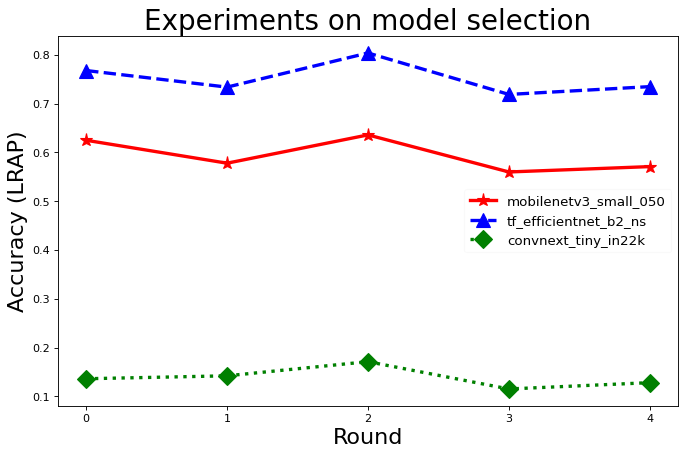

In [ ]:
data = acc_comp 
x = np.array([0,1,2,3,4])

plt.figure(figsize=(10,6), dpi=80)  

plt.plot(x, data['mobilenetv3_small_050'], 'r-*', linewidth=3, markersize=12, label='mobilenetv3_small_050')  
plt.plot(x, data['tf_efficientnet_b2_ns'], 'b--^', linewidth=3, markersize=12, label='tf_efficientnet_b2_ns')   
plt.plot(x, data['convnext_tiny_in22k'], 'g:D', linewidth=3, markersize=12, label='convnext_tiny_in22k')
plt.legend(loc=0, fontsize=12, framealpha=0.1)   
plt.xticks(x, ['0', '1', '2', '3', '4'])  # 

plt.xlabel('Round', fontsize=20)         
plt.ylabel('Accuracy (LRAP)', fontsize=20)      
plt.title('Experiments on model selection', fontsize=25)    
plt.show()

### **3.4.4 Cross-validation for learning rate selection**

This section shows 5-fold cross-validation experiment on 4 learning rates: 5e-5, 5e-4, 5e-3, 5e-2. Using the Mel feature and EfficientNet-b2.

In [ ]:
# Parameter Tuning for the learning rate
LR_list = [5e-5, 5e-4, 5e-3, 5e-2]
config['epochs'] = 10 # for test

for each_lr in LR_list:
    config['LR'] = each_lr
    config['exp_name'] = 'LR_'+str(each_lr)
    wandb.init(project="Bird", config=config, name=config['exp_name'])
    train(data=mel_data)
    wandb.finish()


Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | EfficientNet      | 8.1 M 
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
8.1 M     Trainable params
0         Non-trainable params
8.1 M     Total params
32.572    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

## 3.5 Project Extra Method: Swin Transformer
So far we have attempted several CNN models. Now we further attempt a new transformer-based model called Swin Transformer. Since running a transformer model can be time-consuming than CNNs thus we choose a smaller model called swin-tiny (without cross-validation).
Let's take the mel-spectrum data as an example. The original size of the data (height and width) is [128, 313]. However, we need to resize the data to a fixed size of [224, 224] because the Swin Transformer splits the input 2D data into several local windows with a fixed size.

In [ ]:
new_exp_name = 'swin_tiny_mel_data'
wandb.init(project="Bird", config=config, name=new_exp_name)
wandb.config['model'] = 'swin_tiny_patch4_window7_224' 
wandb.config['exp_name'] = new_exp_name
wandb.config['epochs'] = 10 # for test

train(data=mel_data)

# wandb.finish()

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type              | Params
----------------------------------------------------
0 | backbone      | SwinTransformer   | 27.7 M
1 | loss_function | BCEWithLogitsLoss | 0     
----------------------------------------------------
27.7 M    Trainable params
0         Non-trainable params
27.7 M    Total params
110.889   Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
print('The accuracy of Swin Transformer is : ', round(wandb.run.summary['best_acc'], 3))

The accuracy of Swin Transformer is :  0.135


## **3.6 Short Summary & Discussion**

#### 3.6.1 Analysis on different features

This is a summary of different feature representations, cross-validated by EfficientNet-b2.


| Ranking    | 1       | 2        | 3       |
| ---------- | ------- | -------- | ------- |
| Feature | Mel   | MFCC | Chroma |
| Dimension | 128 | 20 | 12 |
| LRAP       | 0.6258  | 0.4432   | 0.3684 |


* Mel is the best: Mel feature captures richer information over a wider frequency bands, this makes the Mel more universal in various audio tasks including this one. 
* Mel > MFCC: MFCCs are reduced version of Mel, which is more compact. Since bird calls can vary greatly in pitch, duration and intensity, they are more likely to miss some key features or be mixed up with background noise.
* MFCC > Chroma. MFCC performs better than Chroma, this is as expected. Chroma feature quantizes the sound frequency to 12 musical pitch classes, which is more suitable for music task rather than natural audio tasks. 

#### 3.6.2 Analysis on different backbones

| Ranking    | 1       | 2        | 3       |  4|
| ---------- | ------- | -------- | ------- |------- |
| Backbone | Eff.Net-b2 | Mob.Netv3-small | Convnext-tiny |SwinT-tiny|
| LRAP       | 0.7681  |   0.6247 | 0.1361 |  0.1350|

EfficientNet is a well-known SOTA convolutional neural network backbone in computer vision, designed to perform high accuracy while minimizing the number of parameters and computational resources needed. However, pinpointing the exact cause behind EfficientNet-b2's superior performance compared to other backbones is challenging. According to our experiment, we make the following assumptions:

* EfficientNet has transfer strong transfer learning capabilities.
* Neural Architecture Search (NAS) can be useful. EfficientNet uses Neural Architecture Search, which offers better trade-offs between accuracy and computational complexity.

To our surprise, we noticed that transformer-based SwinT-tiny performs the worest in this task. Here are our assumptions:
* In this task, capturing local feature is more important than global feature, since the bird's signal only take up a very limited region in Mel-spectrum, and most of the information is useless and can even be disturbing.
* CNNs can capture local features more effectively due to their convolutional layers.
* Transformers are good at capturing long-range dependencies in visual data, as described above, such long-range dependencies might not be as relevant or useful in this case.
* We believe that a better alternative is to apply transformer on sequence-like data rather than image-like data in audio classification task.


# **4. Traditional Machine Learning Methods**

In this chapter, we perform different traditional machine learning algorithms (see 4.2.2) using different dimension reduction techniques (see 4.2.1) based on MFCC features (see 4.1). We report results and give discussions in Section 4.3. 

## **4.1 Feature preparation (based on MFCC)**
In the last deep learning chapters, we have seen that although Mel features have the best performance, their large dimension also leads to high computational complexity. In contrast, MFCC has a more compromised and balanced performance and feature dimension. Also, it is not convenient to use GPU acceleration for traditional machine learning methods as we have done for deep learning. Therefore, all of our traditional machine learning experiments are based on MFCC features.



#### **4.1.1 Pre-compute MFCC features**
We obtain MFCC features from the Mel features which we already have. So we load the pickle file containing Mel features, and convert them into MFCC features with 12 coefficients using the code below:

In [ ]:
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import csv
from scipy import io
import pickle
from IPython.display import Audio, display
import os.path

In [ ]:
def load_pickle(fname):
    f = open(fname, 'rb')
    out = pickle.load(f)
    f.close()
    return out

data_file = load_pickle('train_mel(dB,sr=32k,bin=128).pickle3')  # load pickle file containing Mel features
mels = data_file['mel']


mfccs = [0] * len(mels)
for i, mel in enumerate(mels):
    current_mfcc = librosa.feature.mfcc(S=mel, n_mfcc=20)
    current_mfcc = current_mfcc.T
    mfccs[i]= current_mfcc
    if i % 100 == 0:
        print(f"{i}")

data_file['mfcc'] = mfccs   # add mfcc entry to data_dict
del data_file['mel']  # delete mel entry

with open("mfccs(n=20).pickle3", 'wb') as file: # save ,fcc pickle
    pickle.dump(data_file, file)

#### **4.1.2 Train/val set split: Rare classes handling** 
In practice, when splitting the dataset into training (80%) and validation (20%) sets, we found that for some relatively rare categories (e.g., 'afpkin1', 'brtcha1', 'crefra2 ...), due to their limited number of samples, there exits the possibility that some of them may only appear in the validation set but are missing in training set. Such an imbalance would result in the model being unable to learn features from these samples. To address this issue, we conducted an explicit inspection of the training and validation sets after splitting. We identified samples that were exclusively present in the validation set and incorporated them into the training set to ensure that the model could learn their features as much as possible.

In [ ]:
def data_split(data, data_indices, val_fold_idx, k_fold, prefix='mfcc'):
    assert prefix in ['mfcc', 'mel', 'chroma']
    val_indices = data_indices[val_fold_idx*len(data_indices)//k_fold: (val_fold_idx+1)*len(data_indices)//k_fold]  # 分为k_fold份，第val_fold_idx子份作为验证集
    train_indices = [idx for idx in data_indices if idx not in val_indices]  # 其余作为训练集
    train_labels = [data['primary_label'][i] for i in train_indices]

    val_labels = [data['primary_label'][i] for i in val_indices]
    missing_labels = list(set(val_labels)-set(train_labels)) # labels in val set but not in train set
    # val_indices_copy = val_indices.copy()
    for i, val_idx in enumerate(val_indices):
        if data['primary_label'][val_idx] in missing_labels:  # if a sample's label is in val set but not in train set
            train_indices.append(val_indices.pop(i))  # then we shift it from val set to train set

    # fetch the data
    train_inps = [data[prefix][i] for i in train_indices]
    train_tags = [data['primary_label_idx'][i] for i in train_indices]
    train_tag_names = [data['primary_label'][i] for i in train_indices]


    test_inps = [data[prefix][i] for i in val_indices]
    test_tags = [data['primary_label_idx'][i] for i in val_indices]
    test_tag_names = [data['primary_label'][i] for i in val_indices]


    return train_inps, train_tags, train_tag_names, test_inps, test_tags, test_tag_names


In [21]:
# Define function which converts idx into one-hot vector.
def idx_2_onehot(tag_list):
    new_tag_list = np.zeros((len(tag_list), 264))
    for index, each_tag in enumerate(tag_list): 
        new_tag_list[index][each_tag] = 1
    return new_tag_list

In [ ]:
data = load_pickle('train_mfcc(n=20).pickle3')
data_indices = list(range(len(data['primary_label'])))
random.seed(42)  # do not change this otherwise the split will be different
random.shuffle(data_indices)  # a shuffled list containing data indices (for data split)
val_fold_idx =0
k_fold=5
prefix='mfcc'

train_mfccs, train_mfcc_tags, train_tag_names, test_mfccs, test_mfcc_tags, test_tag_names = data_split(data, data_indices, val_fold_idx, k_fold, prefix )

# input data transpose from [20, x] --> [x, 20]
train_mfccs = [i.T for i in train_mfccs]
test_mfccs = [i.T for i in test_mfccs]

# generate one-hot class
train_mfcc_tags = idx_2_onehot(train_mfcc_tags)
test_mfcc_tags = idx_2_onehot(test_mfcc_tags)

In [ ]:
train_tag_names = [i.split(',') for i in train_tag_names]
train_tag_names, _ = unique(concatenate(train_tag_names), return_counts=True)


test_tag_names = [i.split(',') for i in test_tag_names]
test_tag_names, _ = unique(concatenate(test_tag_names), return_counts=True)


264 239


#### **4.1.3 Feature pre-processing** 
According to the experience in assignment 2, the MFCC vectors are time-series. one trick to include time-series information into a vector representation is to append the difference between two consecutive feature vectors. This way, we can include some relationship between two time steps in the representation. The resulted feature is called delta MFCC (dMFCC).

In [ ]:
# compute delta MFCCs
def compute_delta_mfccs(mfccs):
    dmfccs = []
    for m in mfccs:
        tmp = m[1:] - m[0:-1]
        dm = hstack((m[0:-1], tmp))
        dmfccs.append(dm)
    return dmfccs

Compute dMFCC

In [ ]:
train_dmfccs = compute_delta_mfccs(train_mfccs)
test_dmfccs  = compute_delta_mfccs(test_mfccs)

In [ ]:
# put dmfccs from all training data together
all_dmfccs = vstack(train_dmfccs)
print(all_dmfccs.shape)

(34311246, 40)


Use k-means to cluster dMFCC features to create bag of words (BoW) codebook.

In [ ]:
# run k-means to build codebook
km = cluster.KMeans(n_clusters=100, random_state=4487)
km.fit(all_dmfccs[0::100])  # subsample by 10 to make it faster
km.cluster_centers_

array([[-3.87756805e+02,  9.66872177e+01,  8.70041275e+00, ...,
        -2.67536398e-02, -2.83842180e-02,  7.99227599e-03],
       [-4.36631592e+02,  8.27697678e+01, -6.29739380e+01, ...,
        -1.00903474e-01, -1.35251563e-02, -1.21558763e-01],
       [-1.69154297e+02,  7.31892548e+01,  7.30812454e+00, ...,
        -2.56825853e-02, -1.31877745e-02, -1.10007152e-01],
       ...,
       [-6.07598877e+02,  2.55123882e+01,  3.98644638e+00, ...,
         5.89670539e-02, -5.63459657e-02, -6.01137467e-02],
       [-6.05324341e+02, -6.35695839e+01, -1.05765671e+02, ...,
        -1.50049657e-01, -6.64270297e-02, -3.82647477e-02],
       [-2.17034088e+02,  6.34821930e+01, -2.57760448e+01, ...,
         1.56664867e-02,  1.19184023e-02,  9.59139392e-02]], dtype=float32)

Convert dMFCC into BoW features.

In [ ]:
def bow_transform(model, mfccs):
    numwords = model.cluster_centers_.shape[0]
    bows = zeros((len(mfccs), numwords))
    for i in range(len(mfccs)):
        w = model.predict(mfccs[i])
        bw = bincount(w, minlength=numwords)
        bows[i,:] = bw
    return bows

In [ ]:
train_bow = bow_transform(km, train_dmfccs)
test_bow  = bow_transform(km, test_dmfccs)

In [ ]:
train_classes = train_mfcc_tags
test_classes = test_mfcc_tags
print(test_mfcc_tags.shape)

(3386, 264)


## **4.2 Experiments**

### **4.2.1 Different Dimensionality Reduction Methods**
In this section, we fix the classifier to most basic Logisitic Regression and try different classical dimension reduction  algorithms which we have learned in the crouse, including lin KMeans+TF-IDF, PCA, KPCA and NMF. Cross-validation for parameter search is also included.

In [ ]:
def evaluate_tagmodels(tagmodels, train_x=train_Xtf, test_x=test_Xtf):
    # test set
    test_predscore = zeros(shape=testY.shape)
    for i,t in enumerate(test_tag_names):
        # print('predicting {} - {}'.format(i, t))
        tmp = tagmodels[t].decision_function(test_x)
        test_predscore[:,i] = tmp
    # ROC_test = metrics.roc_auc_score(testY, test_predscore, average=None).mean()
    
    LRAP = metrics.label_ranking_average_precision_score(testY, test_predscore)
    
    # print(f'train: {ROC_train}, test: {ROC_test}')
    print(f'The LRAP of test is : {LRAP}')

#### TF-IDF + K means
We first run experiment using TF-IDF BoW features and Logistic regression as a baseline work.


Apply TF-IDF to the count vectors.

In [ ]:
# convert to TF
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
train_Xtf = tf_trans.fit_transform(train_bow)
test_Xtf  = tf_trans.transform(test_bow)

Learn a logisic regression classifier for each tag.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

tagmodels = {}

for i,t in enumerate(train_tag_names):
    print('training {} - {}'.format(i, t))
    myY = train_classes[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', n_jobs=8)
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr

training 0 - abethr1
training 1 - abhori1
training 2 - abythr1
training 3 - afbfly1
training 4 - afdfly1
training 5 - afecuc1
training 6 - affeag1
training 7 - afgfly1
training 8 - afghor1
training 9 - afmdov1
training 10 - afpfly1
training 11 - afpkin1
training 12 - afpwag1
training 13 - afrgos1
training 14 - afrgrp1
training 15 - afrjac1
training 16 - afrthr1
training 17 - amesun2
training 18 - augbuz1
training 19 - bagwea1
training 20 - barswa
training 21 - bawhor2
training 22 - bawman1
training 23 - bcbeat1
training 24 - beasun2
training 25 - bkctch1
training 26 - bkfruw1
training 27 - blacra1
training 28 - blacuc1
training 29 - blakit1
training 30 - blaplo1
training 31 - blbpuf2
training 32 - blcapa2
training 33 - blfbus1
training 34 - blhgon1
training 35 - blhher1
training 36 - blksaw1
training 37 - blnmou1
training 38 - blnwea1
training 39 - bltapa1
training 40 - bltbar1
training 41 - bltori1
training 42 - blwlap1
training 43 - brcale1
training 44 - brcsta1
training 45 - brctch1

To see how we did on tagging the training set, we compute the tag scores.

In [ ]:
train_predscore = zeros(shape=(len(train_mfccs), len(train_tag_names)))

for i,t in enumerate(train_tag_names):
    tmp = tagmodels[t].decision_function(train_Xtf)
    train_predscore[:,i] = tmp

Plot the ROC curve using the training classes and training predicted scores. (Note that AUC is the AUC of the black curve, while MCAUC is the average of the AUCs for all the color curves.)

In [ ]:
# plot an ROC curve using class labels and class scores
import numpy as np

def plot_roc(tagnames, Yclasses, Yscores):
    fprall = []
    tprall = []
    aucall = []

    missing_count = 0
    for i in range(len(tagnames)):
        if Yclasses[:, i].sum() == 0:
            missing_count = missing_count+1
            continue
        fpr, tpr, thresholds = metrics.roc_curve(Yclasses[:,i], Yscores[:,i])

        plt.plot(fpr, tpr, lw=0.5, alpha=0.5)
        auc = metrics.auc(fpr, tpr)

        tprall.append(tpr)        
        fprall.append(fpr)
        aucall.append(auc)

    # Then interpolate all ROC curves at this points
    all_fpr = unique(concatenate(fprall))
    mean_tpr = zeros_like(all_fpr)
    
    for i in range(len(tagnames)-missing_count):
        mean_tpr += interp(all_fpr, fprall[i], tprall[i])

    # Finally average it and compute AUC
    mean_tpr /= len(tagnames)

    # auc of the average ROC curve
    auc = metrics.auc(all_fpr, mean_tpr)

    # average AUC
    mc_auc = mean(aucall)

    plt.plot(all_fpr, mean_tpr, 'k-', lw=2)
    plt.title('MCAUC={:.4f}, AUC={:.4f}'.format(mc_auc, auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    plt.grid(True)

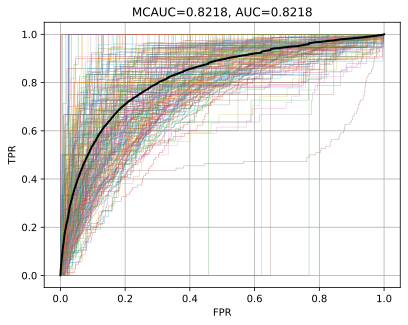

In [ ]:
plot_roc(train_tag_names, train_classes, train_predscore)

Now apply the LR classifiers to the test set to predict the score for each tag.

In [ ]:
test_predscore = zeros(shape=(len(test_mfccs), len(train_tag_names)))

for i,t in enumerate(train_tag_names):
    tmp = tagmodels[t].decision_function(test_Xtf)
    test_predscore[:,i] = tmp

(239,) (3386, 264) (3386, 264)


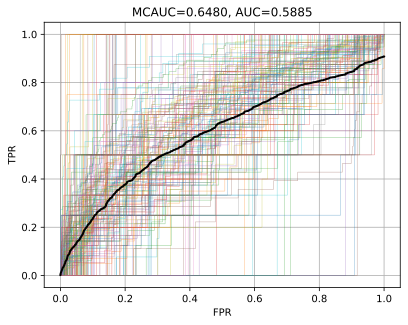

In [ ]:
plot_roc(test_tag_names, test_classes, test_predscore)

In [ ]:
evaluate_tagmodels(tagmodels, train_Xtf, test_Xtf)

The LRAP of logistic regression is:  0.010538403687873127


#### PCA

In [ ]:
print('\n----- Logistic Regression with PCA ------')

pca = decomposition.PCA(n_components=20) 
WtrainX  = pca.fit_transform(trainX)  
WtestX = pca.transform(testX)  
print(WtrainX.shape, WtestX.shape)

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', max_iter=2000, n_jobs=8)
    lr.fit(WtrainX, myY)
    tagmodels[t] = lr



----- Logistic Regression with PCA ------
(13555, 20) (3386, 20)


In [ ]:
# evaluation for logistic regression (with PCA)
evaluate_tagmodels(tagmodels, WtrainX, WtestX)

The LRAP of test is : 0.017044493262997364


#### NMF

In [ ]:
print('\n------- Linear Dimensionality Reduction - NMF ----------')

nmf = decomposition.NMF(n_components=20)
WtrainX_nmf  = nmf.fit_transform(trainX)  
WtestX_nmf = nmf.transform(testX)  

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', max_iter=2000, n_jobs=8)
    lr.fit(WtrainX_nmf, myY)
    tagmodels[t] = lr



------- Linear Dimensionality Reduction - NMF ----------


In [ ]:
# evaluation (Linear Dimensionality Reduction - NMF)
evaluate_tagmodels(tagmodels, WtrainX_nmf, WtestX_nmf)

The LRAP of test is : 0.01852515536587298


#### KPCA

In [ ]:
print('------- Non-Linear Dimensionality Reduction - KPCA ----------')

kpca = decomposition.KernelPCA(n_components=20, kernel='rbf', gamma=0.001, n_jobs=-1)
WtrainX_kpca  = kpca.fit_transform(trainX)  
WtestX_kpca = kpca.transform(testX)  

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', max_iter=2000, n_jobs=8)
    lr.fit(WtrainX_kpca, myY)
    tagmodels[t] = lr


------- Non-Linear Dimensionality Reduction - KPCA ----------


In [ ]:
# evaluation (KPCA)
evaluate_tagmodels(tagmodels, WtestX_kpca)

(3386, 264) (3386, 264)
The LRAP of test is : 0.01498271004739197


### **4.2.2 Try Different Classifiers**

In this section, we fix the feature representation to TF-IDF BoW and try different classical machine learning algorithms which we have learned in the crouse, including linear logistic regression, linear SVM, kernel SVM, AdaBoost and XGBoost. Cross-validation for parameter search is also included.

**Metrics**: To keep a consistent evaluation with deep learning, we still use LRAP as the metric.

We start with the most naive Logistics Regression.
#### Logistics Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

tagmodels = {}
for i,t in enumerate(train_tag_names):
    myY = train_classes[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', n_jobs=8)
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr

In [ ]:
evaluate_tagmodels(tagmodels)

The LRAP of logistic regression is:  0.010538403687873127


#### Linear SVM

In [ ]:
print('----- SVM with Linear kernel (Grid Search) ------')
C_tmp = logspace(-2, 3, 10)

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = svm.SVC(kernel='linear')
    lr = model_selection.GridSearchCV(estimator=lr, param_grid={'C': C_tmp}, cv=5, n_jobs=8)

    lr.fit(train_Xtf, myY)
    tagmodels[t] = model_linear

----- SVM with Linear kernel (Grid Search) ------


In [ ]:
evaluate_tagmodels(tagmodels)

The LRAP of test is : 0.013554621549314654


#### RBF SVM

In [ ]:
print('----- SVM with RBF kernel ------')
tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = svm.SVC(kernel='rbf')
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr


----- SVM with RBF kernel ------


In [ ]:
evaluate_tagmodels(tagmodels)

The LRAP of test is : 0.013622956314564354


#### AdaBoost

In [ ]:
print('-----  AdaBoost (Grid Search) ------')
parameters = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 1, 10]}

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    adaclf = ensemble.AdaBoostClassifier(random_state=4487)
    lr = model_selection.GridSearchCV(adaclf, parameters, cv=5, n_jobs=8)
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr

-----  AdaBoost (Grid Search) ------


In [ ]:
evaluate_tagmodels(tagmodels)

The LRAP of test is : 0.1926572673255123617


#### XGBoost

In [ ]:
print('-----  XGBClassifier ------')
import xgboost as xgb  

parameters = {
    'max_depth': [3, 5, 7, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2, 1, 10],
    'n_estimators': [50, 100, 150, 200, 300]
}

xgbclf = xgb.XGBClassifier()
xgbclf = model_selection.GridSearchCV(xgbclf, parameters, cv=5, n_jobs=8)
xgbclf.fit(train_Xtf, myY)


-----  XGBClassifier ------


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=8,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 1, 10],
                         'max_depth': [3, 5, 7, 10, 20, 30],
                         'n_estimators': [50, 100, 150, 200, 300]})

In [ ]:
y_pred_xgbclf = xgbclf.predict_proba(test_Xtf)
y_pred_xgbclf = np.argmax(y_pred_xgbclf, axis=1)
onehot_preds = np.zeros_like(testY)
onehot_preds[np.arange(testY.shape[0]), y_pred_xgbclf] = 1
LRAP = metrics.label_ranking_average_precision_score(testY, onehot_preds)

print(f'The LRAP of test is : {LRAP}') 


The LRAP of test is : 0.2496473894288434516


## **4.3** **Short Summary & Discussion**

#### 4.3.1 Analysis on different classifiers
According to our experiment, here is the ranking of the performance:

| Ranking    | 1       | 2        | 3       | 4          | 5                   |
| ---------- | ------- | -------- | ------- | ---------- | ------------------- |
| Classifier | XGBoost | AdaBoost | RBF SVM | Linear SVM | Logistic Regression |
| LRAP       | 0.2496  | 0.1926   | 0.01362 | 0.01355    | 0.01053             |

Here are our assumptions regrading to the results:

* Boosting >> Others.
    *  We think bag-of-words models typically produce high-dimensional, sparse feature vectors, which give the data a complex non-linear structure, Boosting algorithms (XGBoost and AdaBoost) can adaptively combine multiple weak classifiers to solve this non-linearity, whereas SVMs (linear SVM and RBF SVM) can typically only handle linearly separable or slightly non-linear data.
    * In our task, there is too much noise in the background, and the bird's sound are relatively sparse. The Boosting algorithm has good robustness to deal with problems such as noise and missing values, to which SVMs may be more sensitive. 


* XGBoost > AdaBoost
    * The high performance of XGBoost is probably due to its ability to adapt the learning rate, as well as the missing values.
    * XGBoost is empirically slightly better than AdaBoost.


* RBF SVM > Linear SVM 
    * RBF SVM can perform non-linearly mapping to a higher dimensional feature space. This allows RBF SVM to find the optimal classification hyperplane. Linear SVM can only learn linear classification, which might be less effective in this case.


* SVM > Logistic Regression
    * SVM typically works well when the feature dimension is high. Logistic Regression might fall short when handling high-dimensional space.
    * SVM finds the optimal classification hyperplane by maximizing the gap between classes, which can be more robust. Logistic Regression learns by maximizing the likelihood estimation, the decision boundary might not be so accurate.
    

#### 4.3.2 Analysis on different dimension reduction
According to our experiment, here is the ranking of the performance:

| Ranking     | 1       | 2       | 3        | 4               |
| ----------- | ------- | ------- | -------- | --------------- |
| Dim. Reduc. | NMF     | PCA     | KPCA     | KMeans + TF-IDF |
| LRAP        | 0.01852 | 0.01704 | 0.014982 | 0.01053         |

Here are our assumptions regrading to the results:

* NMF has the best performance because it is a matrix decomposition method based on the BoW model, which can directly identify the semantically relevant bases in the feature space of the BoW representation. This retains semantic information best.
* PCA is a linear dimensionality reduction method, which maximizes the total variance of the data, but cannot take semantic relevance into account. Therefore, some information is lost compared to NMF.
* KPCA is a non-linear dimensionality reduction method, which maps to a high-dimensional feature space and then performs PCA dimensionality reduction, which is a complicated process and is more likely to lose information.
* KMeans+TF-IDF uses KMeans for clustering and TF-IDF for extracting the keywords of each cluster. This process causes information loss and the keywords are not as accurately selected and do not represent the semantics well, so it is less effective.


# **5. Summary**

In this project, we attempted a variety of methods using a range of features for birds' audio classification.

For deep learning, we first determined Mel-spectrum as the best feature representation from three candidate feature types through cross-validation. Next, we selected EfficientNet-b2 as the best model from four model candidates. Finally, we found the best learning rate to be 5e-4.

For machine learning, we chose MFCC as the data representation due to computational constraints and tried various classifiers, including Logistic Regression, linear SVM, RGF SVM, XGBoost, and AdaBoost. We also used dimension reduction techniques such as PCA, KPCA, and NMF.

We provide discussions and analysis for both scenarios, and in this task, deep learning methods generally performed better. Our final submission uses EfficientNet-b2 trained on Mel-spectrum, and we achieved a score of 0.78 on the Kaggle leaderboard, ranking 351.

# **6. Final Kaggle Submission Code**

This is the standalone, independent inference code for our final Kaggle submission. To run this, you need to download our pretrained model and other stuffs, all available [here](https://portland-my.sharepoint.com/:f:/g/personal/shiyyang8-c_my_cityu_edu_hk/EqviS8tOXRNOnWGyGHzt8aQBRWslBLSaWRM1JHdyS1ldnA?e=hmel1R).

In [ ]:
import torch.nn as nn
from torch.utils.data import Dataset
import pickle, numpy as np
import torch
import pandas as pd
import librosa
import soundfile as sf
from pathlib import Path
import timm
import pytorch_lightning as pl

## for local
device = 'cpu'
ckpt = "/home/yangshiyuan/Projects/birdclef-2023/ckpt/tf_efficientnet_b2_ns_loss-v13.ckpt"
test_data_path = "test_soundscapes"
name_label_2_int_label_pickle_path = "name_label_2_int_label.pickle3"
bird_names_pickle_path = "bird_names.pickle3"

## for kaggle submission
# device = 'cpu'
# ckpt = "/kaggle/input/stuffs/mv2(0.65).ckpt"
# test_data_path = "/kaggle/input/birdclef-2023/test_soundscapes"
# name_label_2_int_label_pickle_path = "/kaggle/input/stuffs/name_label_2_int_label.pickle3"
# bird_names_pickle_path = "/kaggle/input/stuffs/bird_names.pickle3"


def load_pickle(fname):
    f = open(fname, 'rb')
    out = pickle.load(f)
    f.close()
    return out


class MyTestDataset(Dataset):
    def __init__(self, data):
        self.sr = 32000
        self.enable_resample = True  # enable resampling to sr if the actual sr is not sr
        self.duration = 5
        self.audio_length = self.duration * self.sr
        self.name_label_2_int_label = load_pickle(name_label_2_int_label_pickle_path)  # a dict which saves mapping from
        self.data_test_df = data

    def __getitem__(self, index):
        return self.read_file(self.data_test_df.loc[index, "path"])

    def __len__(self):
        return len(self.data_test_df)

    def audio_to_image(self, audio):
        melspec = librosa.feature.melspectrogram(y=audio, sr=self.sr, n_mels=128, fmin=0, fmax=self.sr//2)
        melspec = librosa.power_to_db(melspec).astype(np.float32)
        melspec = self.normalize(melspec)
        melspec = torch.from_numpy(melspec).float().unsqueeze(0).repeat(3, 1, 1)
        return melspec

    def normalize(self, X, eps=1e-6, mean=None, std=None):
        mean = mean or X.mean()
        std = std or X.std()
        X = (X - mean) / (std + eps)
        _min, _max = X.min(), X.max()
        if (_max - _min) > eps:
            V = np.clip(X, _min, _max)
            V = (V - _min) / (_max - _min)
        else:
            V = np.zeros_like(X)
        return V

    def read_file(self, filepath):
        audio, orig_sr = sf.read(filepath, dtype="float32")
        if self.enable_resample and orig_sr != self.sr:
            audio = librosa.resample(audio, orig_sr, self.sr, res_type="kaiser_fast")

        audios = []
        for i in range(self.audio_length, len(audio) + self.audio_length, self.audio_length):
            start = max(0, i - self.audio_length)
            end = start + self.audio_length
            audios.append(audio[start:end])
        if len(audios[-1]) < self.audio_length:
            audios = audios[:-1]

        images = [self.audio_to_image(audio) for audio in audios]
        images = np.stack(images)
        return images

#################################### Define Model here ###########################################
class MyModel(pl.LightningModule):
    def __init__(self,  num_classes=264):
        super().__init__()
        self.num_classes = num_classes
        self.backbone = timm.create_model("tf_efficientnet_b2_ns", pretrained=False)
        self.num_classes = num_classes

        self.in_features = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Sequential(
            nn.Linear(self.in_features, num_classes),
            # nn.Dropout(0.4),
            # nn.Linear(self.num_classes, num_classes)
        )

    def forward(self, images):
        logits = self.backbone(images)
        return logits


my_model = MyModel.load_from_checkpoint(ckpt, train_dataloader=None,validation_dataloader=None, strict=True).to(device)
print(f"ckpt resumed from {ckpt}")
my_model.eval()

############################   Read Test Set       ##################################
df_test = pd.DataFrame(
     [(path.stem, *path.stem.split("_"), path) for path in Path(test_data_path).glob("*.ogg")],
    columns = ["filename", "name" ,"id", "path"]
)
df_test.head()
test_dataset = MyTestDataset(data=df_test)


############################  Make Inference     ##################################

predictions = []
with torch.no_grad(), torch.autocast('cpu'):
    for test_idx in range(len(test_dataset)):
        test_sample_np = test_dataset[test_idx]  # test_sample_np is an ogg's sliced mel images with the size of (120,128,313)
        test_sample_pt = torch.from_numpy(test_sample_np).to(device)  # numpy to torch
        pred = my_model(test_sample_pt).float().softmax(dim=1).detach().cpu().numpy()
        predictions.append(pred)


############################  Write Results   ##################################

bird_names = load_pickle(bird_names_pickle_path)  # bird_names is a list containing 264 bird names
submission_df = pd.DataFrame(columns=['row_id']+bird_names)  # csv head
test_filenames = df_test.filename.values.tolist()

for test_idx, test_file in enumerate(test_filenames):
    pred = predictions[test_idx]
    num_rows = len(pred)
    row_ids = [f'{test_file}_{(i + 1) * 5}' for i in range(num_rows)]
    current_df = pd.DataFrame(columns=['row_id'] + bird_names)
    current_df['row_id'] = row_ids
    current_df[bird_names] = pred
    submission_df = pd.concat([submission_df, current_df]).reset_index(drop=True)

submission_df.to_csv('submission.csv',index=False)
print("done")